# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Library to suppress warnings or deprecation notes
import warnings

warnings.filterwarnings("ignore")

# Libraries to help with reading and manipulating data

import pandas as pd
import numpy as np

# Library to split data
from sklearn.model_selection import train_test_split

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# Libraries to build models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# To tune different models
from sklearn.model_selection import GridSearchCV

# To perform statistical analysis
import scipy.stats as stats

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

## Loading the dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file_path = "/content/drive/MyDrive/UT AI Course/Module 2 - Supervised Learning/Project 2/"
file_name = "Loan_Modelling.csv"

In [ ]:
loan_df = pd.read_csv(file_path + file_name, index_col="ID")

## Data Overview

In [ ]:
loan_df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,,,,,,,,,,,,,
1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
# View data shape
loan_df.shape

(5000, 13)

In [ ]:
# Check types of data to see if they are correct
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   ZIPCode             5000 non-null   int64  
 4   Family              5000 non-null   int64  
 5   CCAvg               5000 non-null   float64
 6   Education           5000 non-null   int64  
 7   Mortgage            5000 non-null   int64  
 8   Personal_Loan       5000 non-null   int64  
 9   Securities_Account  5000 non-null   int64  
 10  CD_Account          5000 non-null   int64  
 11  Online              5000 non-null   int64  
 12  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 546.9 KB


In [ ]:
# Statistical info
loan_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,5000.0,45.338400,11.463166,23.0,35.0,45.0,55.0,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.0,20.0,30.0,43.0
Income,5000.0,73.774200,46.033729,8.0,39.0,64.0,98.0,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.0,93437.0,94608.0,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.0,2.0,3.0,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.7,1.5,2.5,10.0
Education,5000.0,1.881000,0.839869,1.0,1.0,2.0,3.0,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.0,0.0,101.0,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.0,0.0,0.0,1.0
Securities_Account,5000.0,0.104400,0.305809,0.0,0.0,0.0,0.0,1.0


In [ ]:
# Check for duplicates
loan_df.duplicated().sum()

0

* Observations
  - It is interesting htat most people appear not to have a morgage, as ~50% of the data has 0.
  - Average age is around 45 years, and has a 44 year range from 23-67.
  - The average experience appers to be around 20.
  - The standard deviation and spread of income is very large, with a range from \$8k to \$224k a year.
  - Most families have around 2 family members on average.
  - The average credit card spenidng is significanlty lower than income with most of ~75% of the data set spending less than \$2.5k a month, or \$28k a year.
* Sanity checks
  - Not all data has the correct typing, such as:
    - ZIPCode, should be categorical.
    - Personal_Loan, yes/no categorical.
    - Securitie_Account, yes/no categorical.
    - CD_Account, yes/no categorical.
    - Online, yes/no categorical.
    - CreditCard, yes/no categorical.

    These data types can be ints but should be labeled as something else.

  - Experience appears to have wrong values, as you cannot have negative values of experience.
  - No duplicate data.

In [ ]:
# There are some negative values in the "Experience" column so we should correct those.
# First lets check what those "wrong values are"

print(loan_df[loan_df["Experience"] < 0]["Experience"].unique())

[-1 -2 -3]


In [ ]:
# We will assume that these values represent positive years of experience so we will change them to their counterpart.
#I.E: -1 to 1, -2 to 2, -3 to 3
loan_df["Experience"].replace(-1, 1, inplace=True)
loan_df["Experience"].replace(-2, 2, inplace=True)
loan_df["Experience"].replace(-3, 3, inplace=True)


In [ ]:
# Now we will correct the colums we believe to be categorical:
categorical_cols = [
    "ZIPCode",
    "Education",
    "Personal_Loan",
    "Securities_Account",
    "CD_Account",
    "Online",
    "CreditCard",
]

loan_df[categorical_cols] = loan_df[categorical_cols].astype("category")

In [ ]:
# Re-check info
loan_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   int64   
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(7), float64(1), int64(5)
memory usage: 333.0 KB


In [ ]:
# Writing column types in variable for later use:

numerical_cols = loan_df.select_dtypes(include=np.number).columns.tolist()
print(numerical_cols)

category_cols = loan_df.select_dtypes(include="category").columns.tolist()
print(category_cols)

['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Mortgage']
['ZIPCode', 'Education', 'Personal_Loan', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [ ]:
# function to create a boxplot and a histogram in the same plot, seen in Additional Learning material
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots seen in Additional Case Study
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

**Exploring Age**

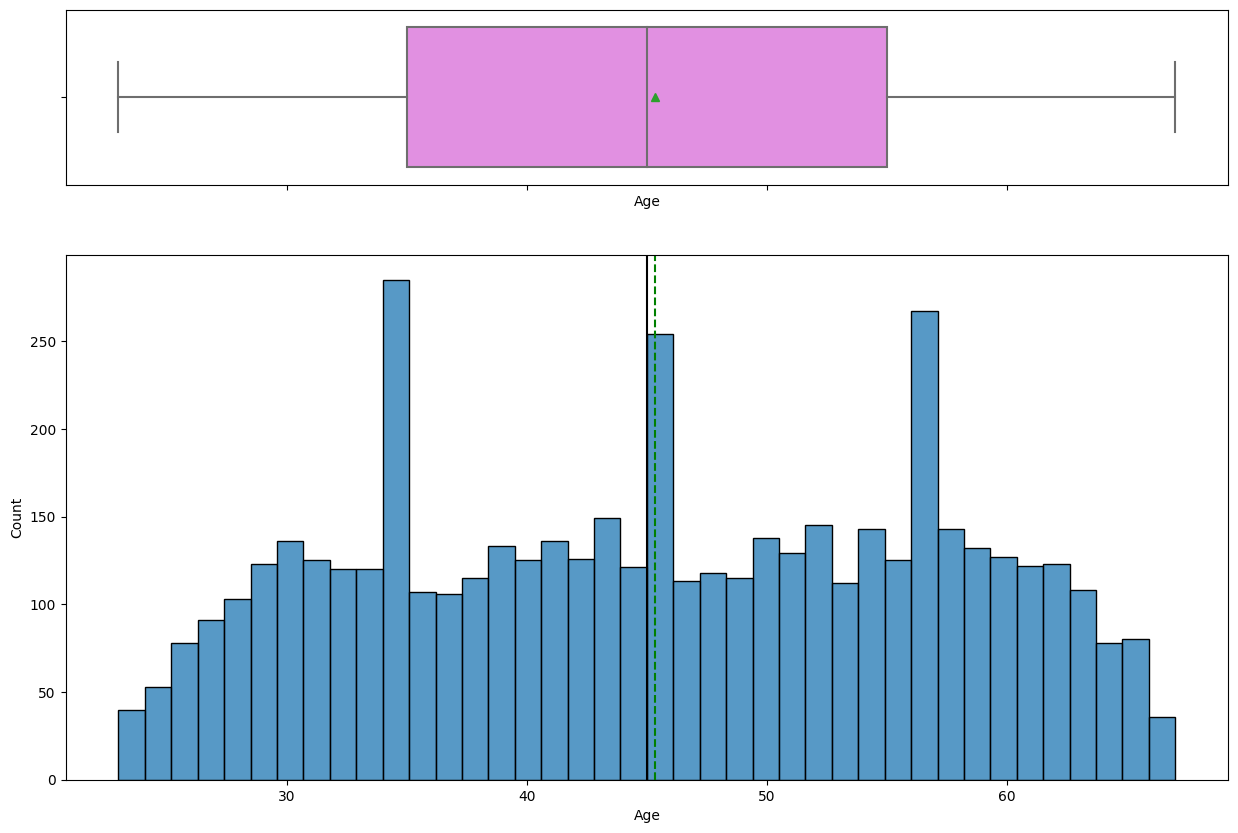

In [ ]:
histogram_boxplot(loan_df, "Age", bins=40)

Observations:
  - The distribution is a multimodal distribution with three peaks.
  - The median is at around 45 years of age, as sseen prevoiusly.
  - The rest of the age bins (not included in the ~35, ~45 and ~56 which form the multimodal peaks) have a similar frequency tailing off at the lower and higher ages.

**Exporing Experience**

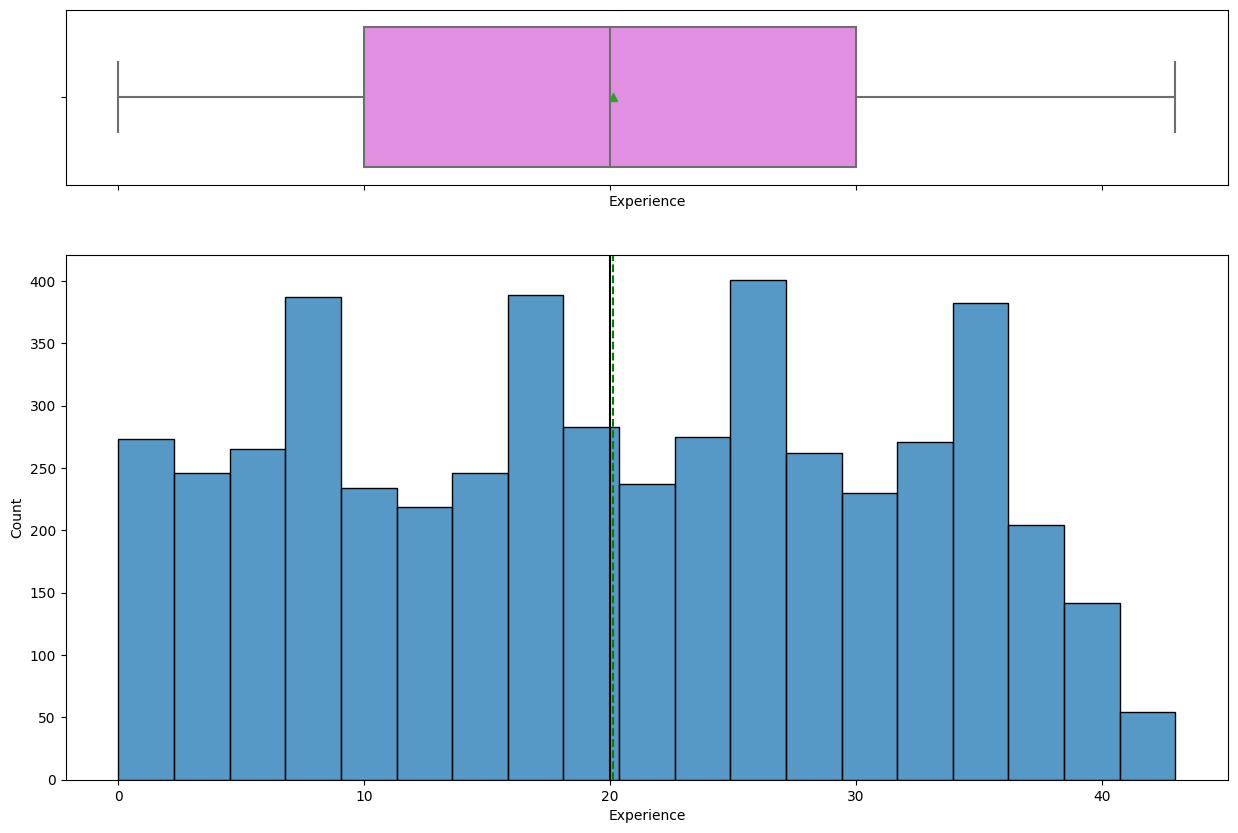

In [ ]:
histogram_boxplot(loan_df, "Experience")

Observations:
  - This is almost a flat distribution wiht some peaks and a tail off at the end.
  - There are no outliers in the data since they are all between two standard deviations away.

**Exporing Income**

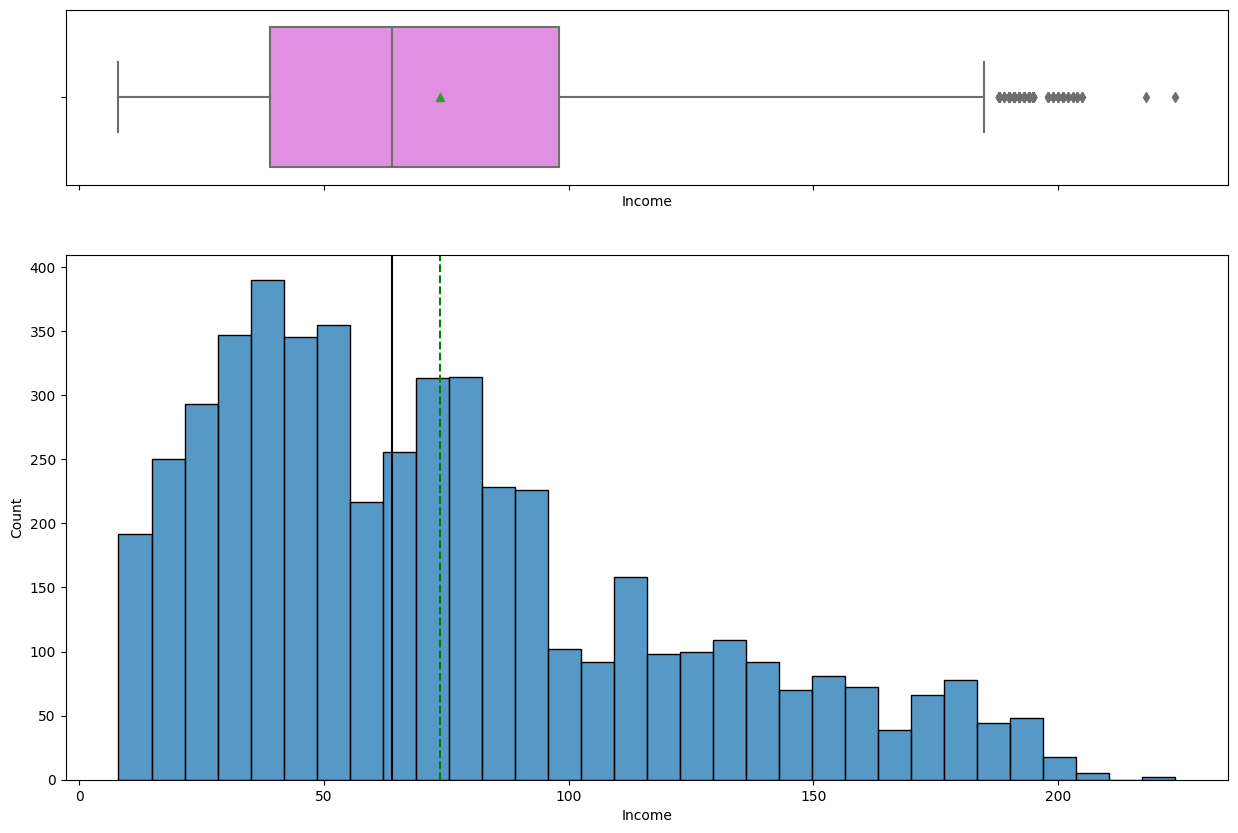

In [ ]:
histogram_boxplot(loan_df, "Income")

Observations:
  - Right skewed distribution with most people generating below \$70k annually.
  - There are some outliers in the data that we might have to clean up.

**Exporing ZIPCode**

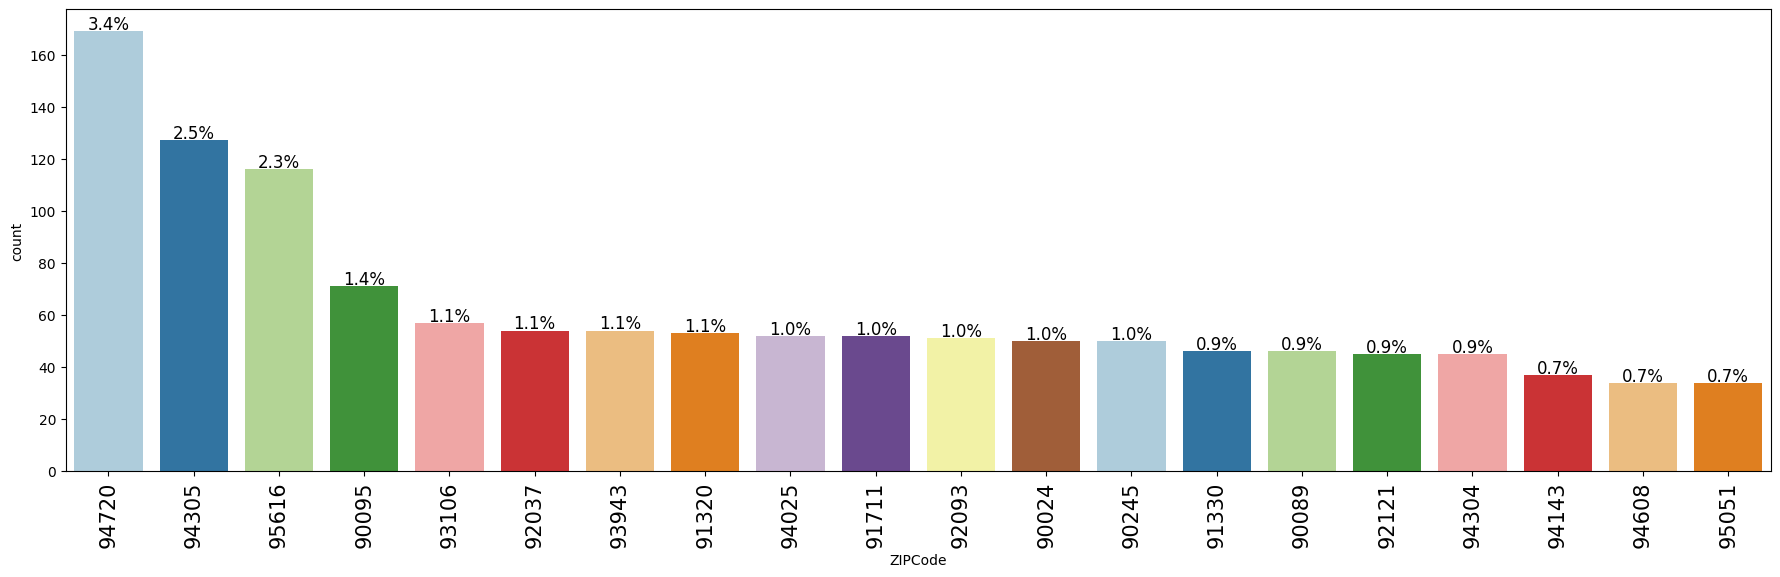

In [ ]:
# Plot 20 most repeated zip codes

n = 20
labeled_barplot(loan_df, "ZIPCode", perc=True, n=20)

Observations:
  - No zip code is repeated for more than 3.4% of the data so it is very distributed.

**Exploring Family**

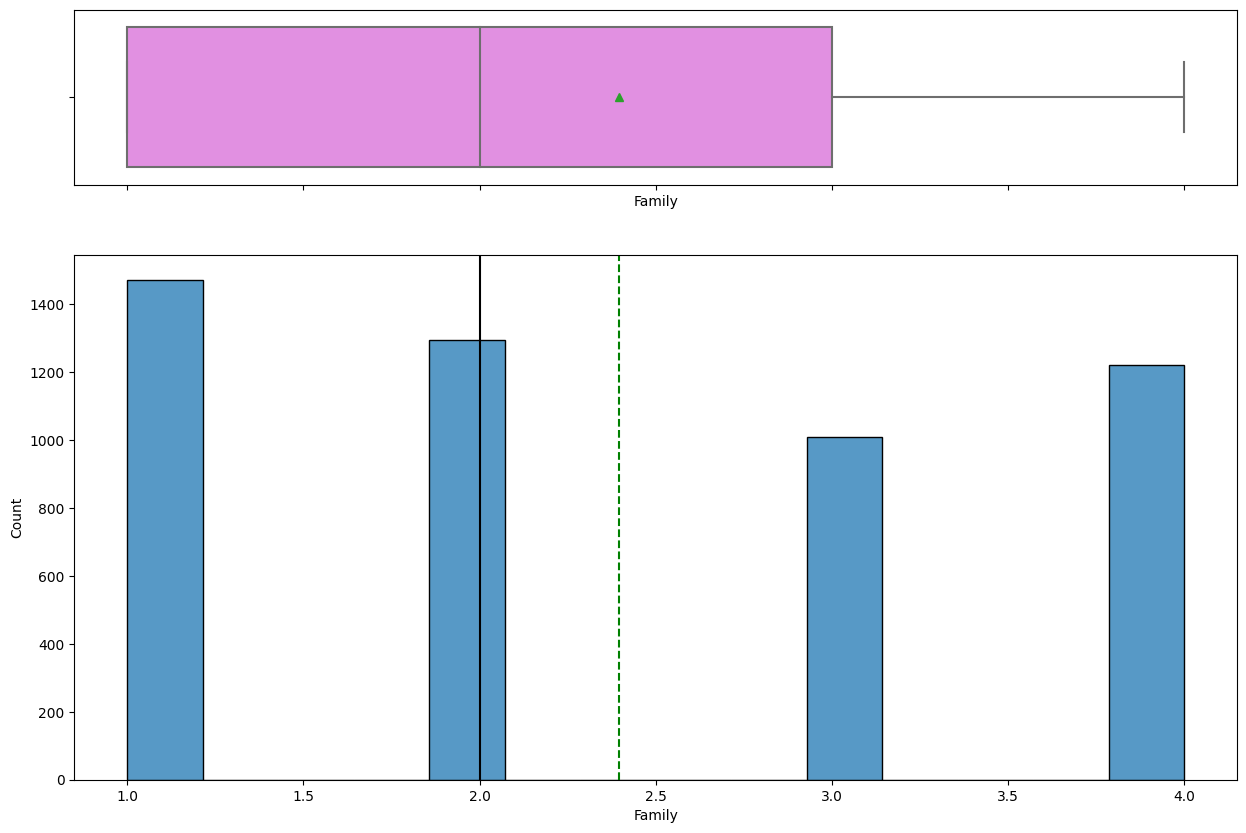

In [ ]:
histogram_boxplot(loan_df, "Family")

Observations:
  - There appears to be no preference on the total amount of children per family as the data is fairly flat.
  - The highest frequency is 1 person in the family, followed by 2, then 4 and then 3.

**Exploring CCAvg**

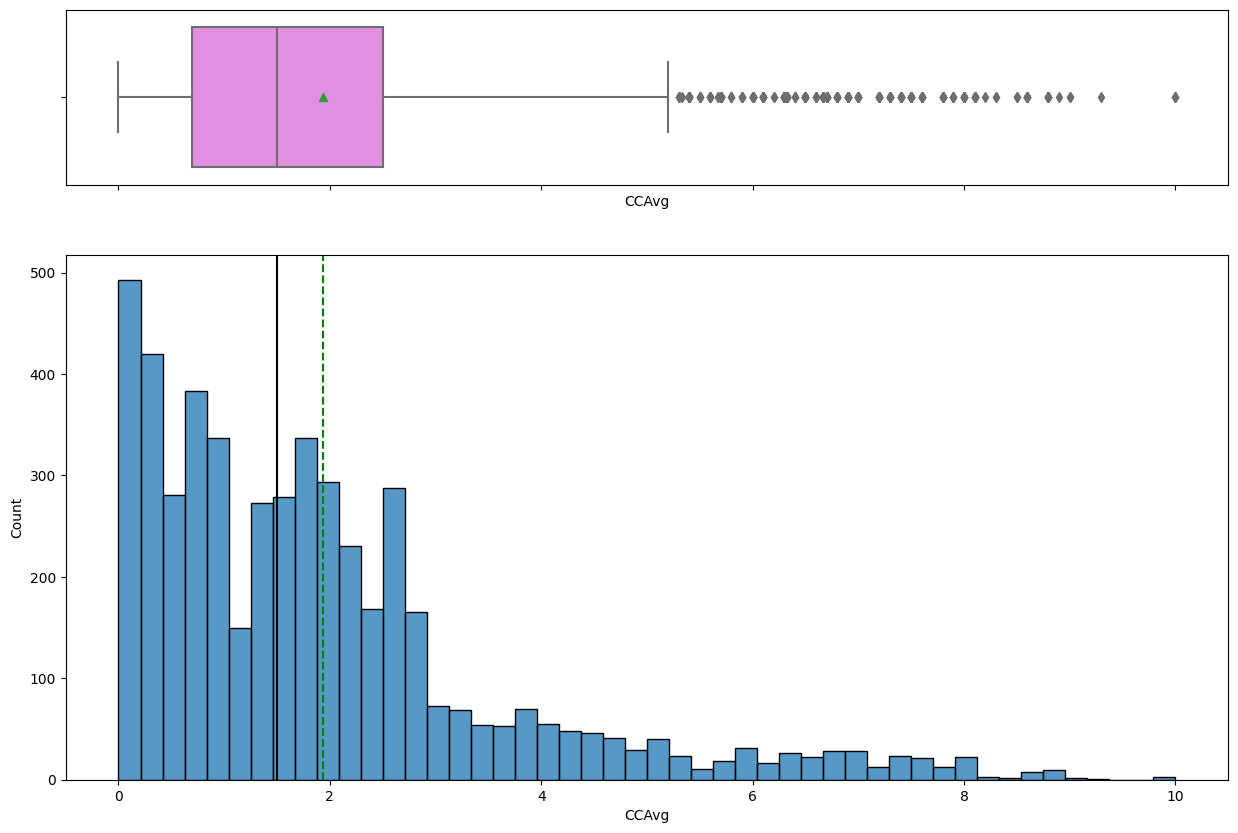

In [ ]:
histogram_boxplot(loan_df, "CCAvg")

Observations:
  - The data appears to follow a negative exponential form with most of hte data being concentrated at the start of the data ant trailing off to the right.
  - There are some outliers that might have to be cleaned.

**Exploring Education**

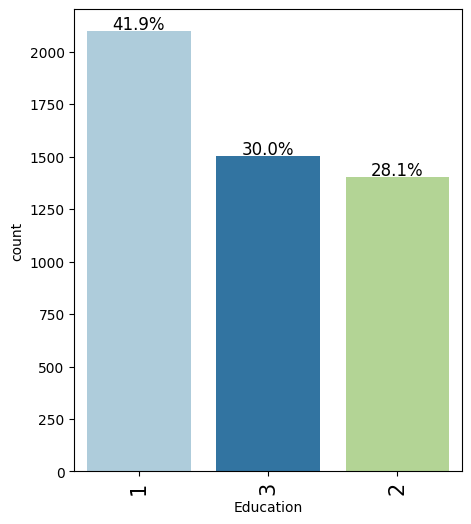

In [ ]:
labeled_barplot(loan_df, "Education", perc=True)

Observations:
  - A majority of the people have an Undergraduate degree.
  - The second largest category is professional and lastly is graduate.

**Exploring Mortgage**

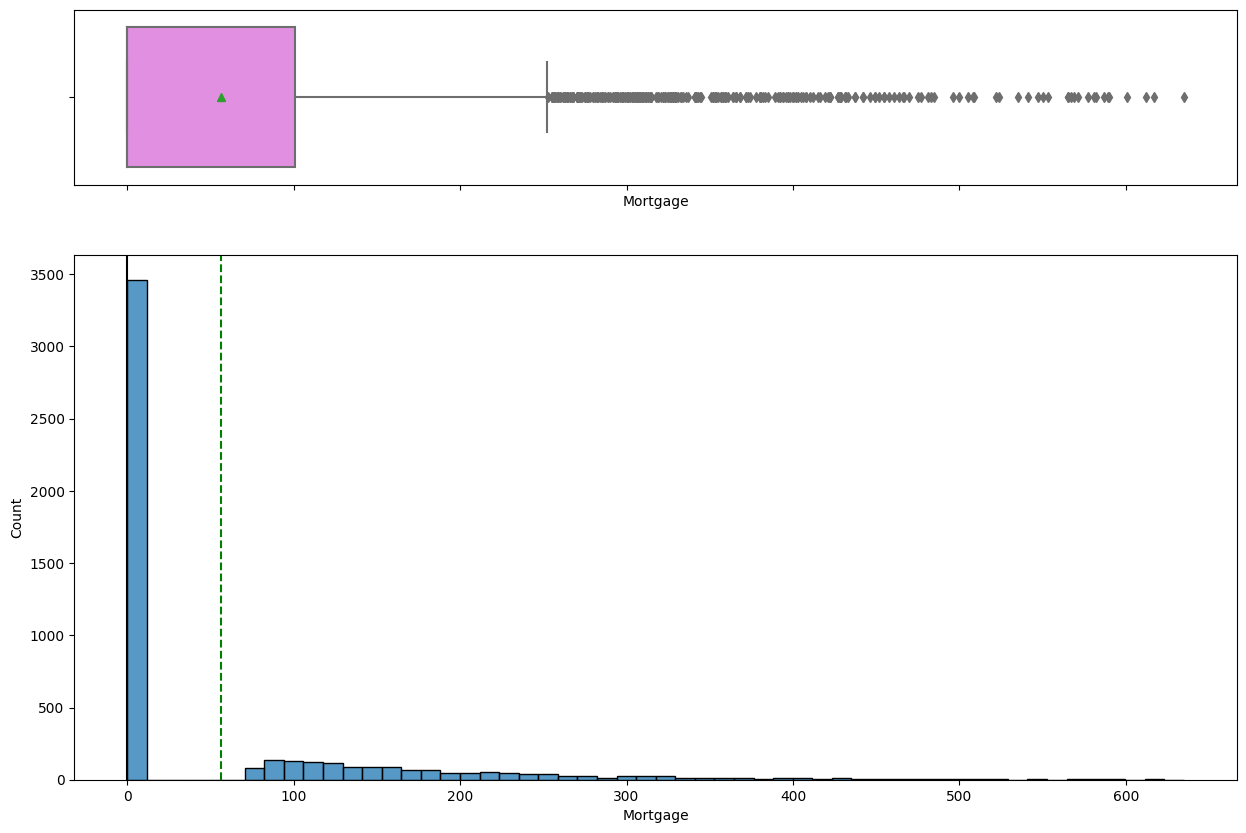

In [ ]:
histogram_boxplot(loan_df, "Mortgage")

**Exploring Personal_Loan**

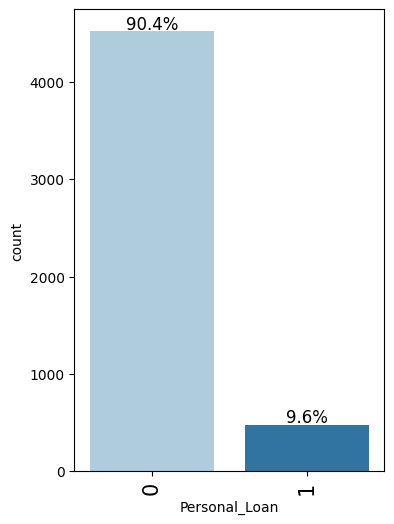

In [ ]:
labeled_barplot(loan_df, "Personal_Loan", perc=True)

Observations:
  - As we know from the problem only 9.6% of people have a personal loan.

**Exploring Securities_Account**

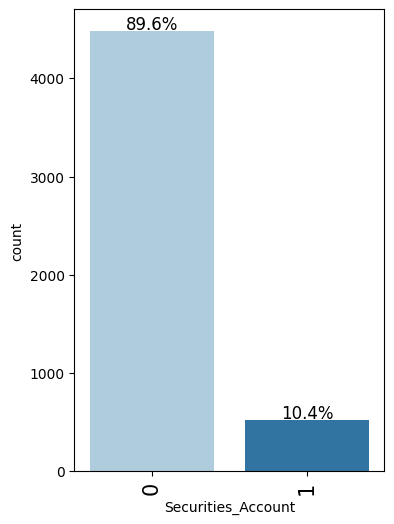

In [ ]:
labeled_barplot(loan_df, "Securities_Account", perc=True)

Observations:
  - Most people do not have securities within the bank, with only 10.4% having securities.

**Exploring CD_Account**

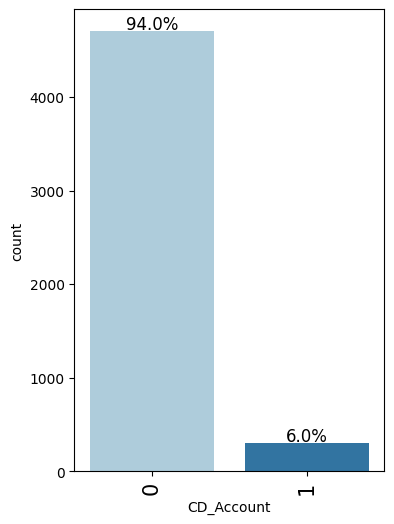

In [ ]:
labeled_barplot(loan_df, "CD_Account", perc=True)

Observations:
  - A very low percent of people have a CD account, even lower than the amount of personal loans.

**Exploring Online**

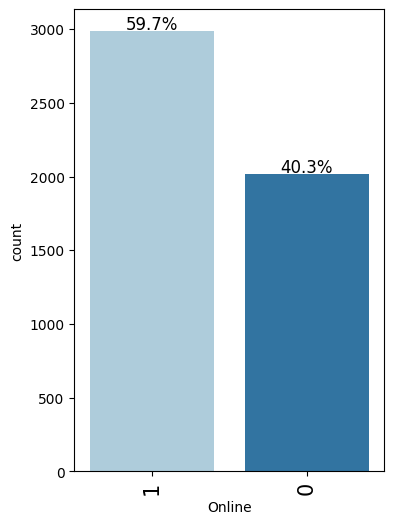

In [ ]:
labeled_barplot(loan_df, "Online", perc=True)

Observations:
  - Most of the people do have an online account with 59.7% of people.

**Exploring CreditCard**

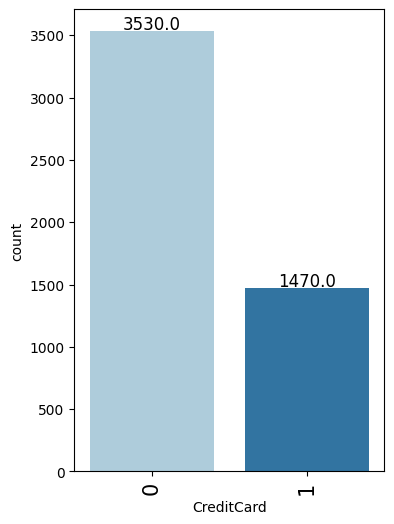

In [ ]:
labeled_barplot(loan_df, "CreditCard")

Observations:
  - Most of the cusotmers are loyal to the bank, as they do not own any other credit cards.
  - Only 29.4% of people had a credit card from another bank.

**Understanding Outliers:**

In [ ]:
Q1 = loan_df.quantile(0.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = loan_df.quantile(0.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

((loan_df.select_dtypes(include=["float64", "int64"]) < lower)
    |(loan_df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(loan_df) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

Most of the data does not have outliers except for the three categories we had outlined previously. However,
this is a small part of the data and I think it will bring meaningfull insight. If we were to remove these outliers we would likely lose out on an important piece of data. For example, the Mortgage outliers are 5.82% of the data but could bring insight into what people with high mortgages should do when presented with the personal loan.

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart seen in Additional Case Study
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
### function to plot distributions wrt target from Additional Case Study

def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

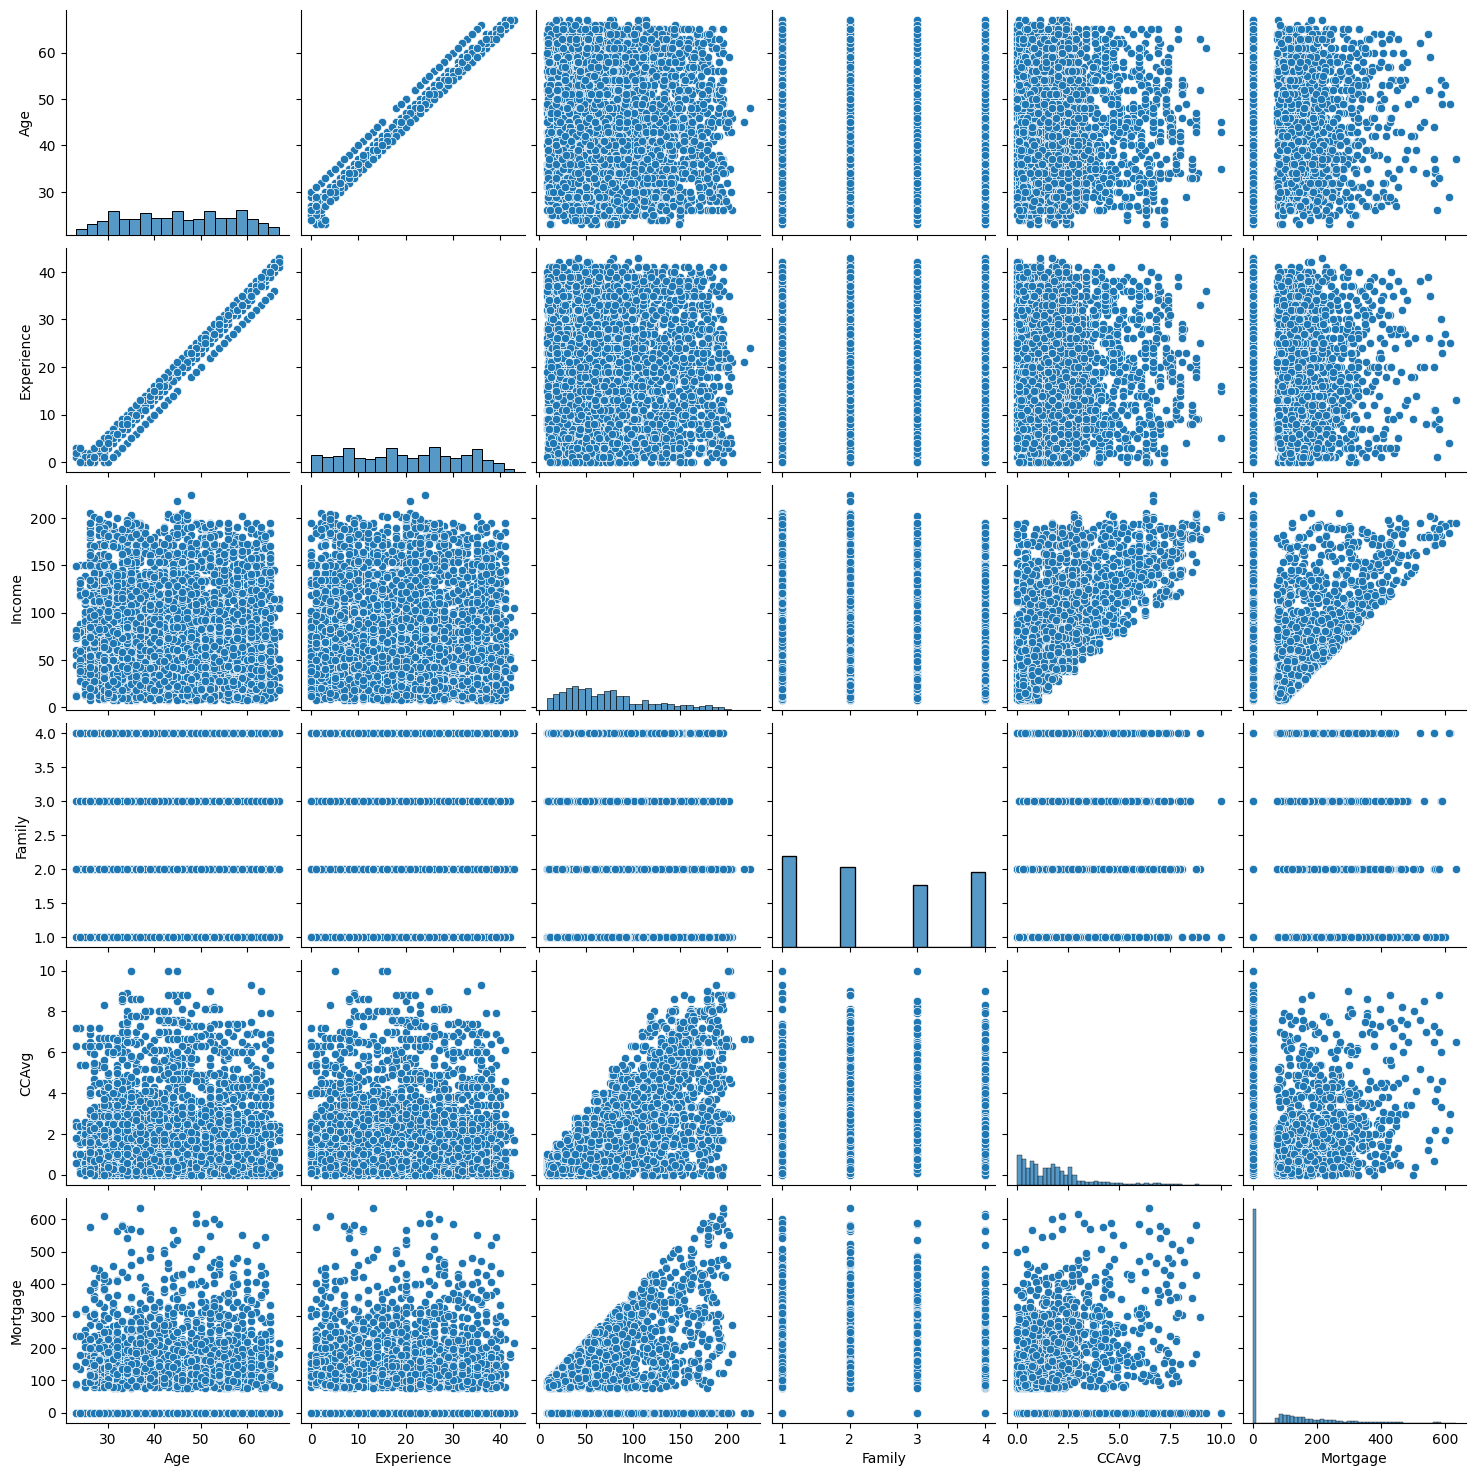

In [ ]:
# Plotting pairplot
sns.pairplot(data=loan_df)
plt.show()


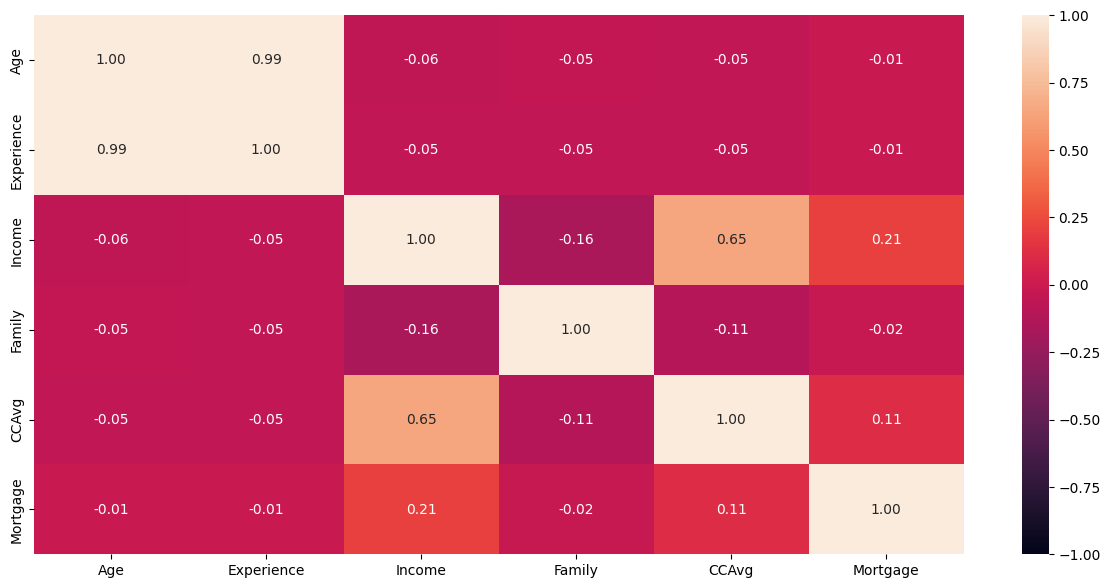

In [ ]:
# Viewing correlations:
plt.figure(figsize=(15, 7))
sns.heatmap(loan_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f")
plt.show()

Personal_Loan     0    1   All
ZIPCode                       
All            4520  480  5000
94720           150   19   169
94305           114   13   127
92093            42    9    51
90095            63    8    71
...             ...  ...   ...
92866             8    0     8
92843             3    0     3
92835             3    0     3
92833             4    0     4
90005             5    0     5

[468 rows x 3 columns]
------------------------------------------------------------------------------------------------------------------------


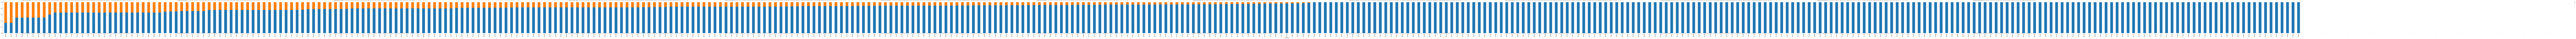

Personal_Loan     0    1   All
Education                     
All            4520  480  5000
3              1296  205  1501
2              1221  182  1403
1              2003   93  2096
------------------------------------------------------------------------------------------------------------------------


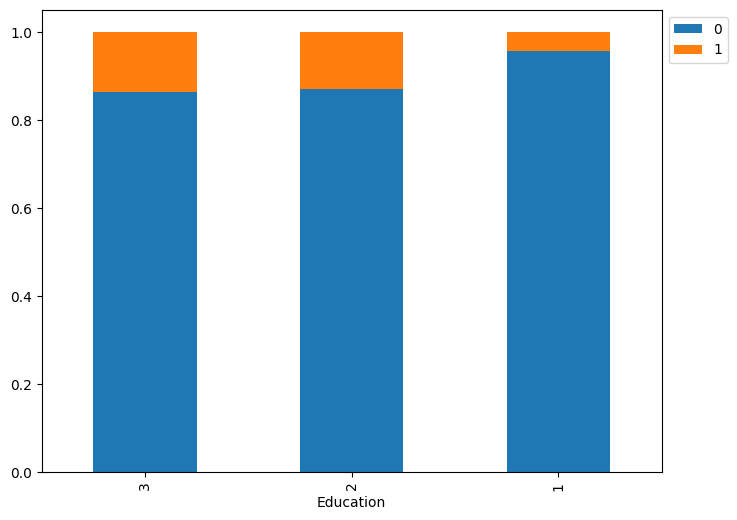

Personal_Loan          0    1   All
Securities_Account                 
All                 4520  480  5000
0                   4058  420  4478
1                    462   60   522
------------------------------------------------------------------------------------------------------------------------


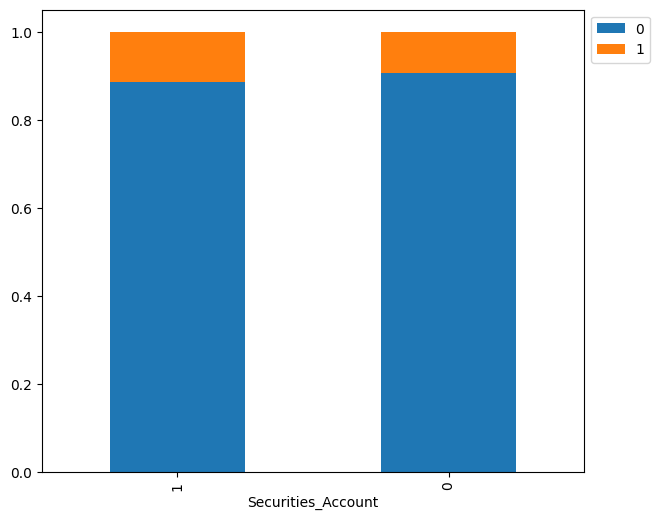

Personal_Loan     0    1   All
CD_Account                    
All            4520  480  5000
0              4358  340  4698
1               162  140   302
------------------------------------------------------------------------------------------------------------------------


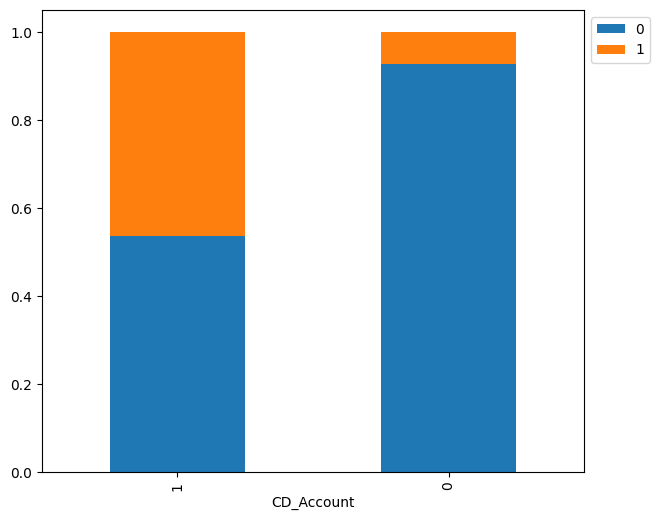

Personal_Loan     0    1   All
Online                        
All            4520  480  5000
1              2693  291  2984
0              1827  189  2016
------------------------------------------------------------------------------------------------------------------------


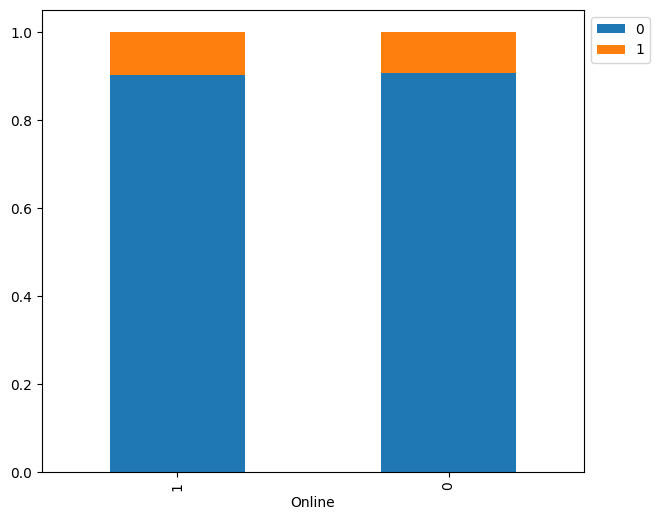

Personal_Loan     0    1   All
CreditCard                    
All            4520  480  5000
0              3193  337  3530
1              1327  143  1470
------------------------------------------------------------------------------------------------------------------------


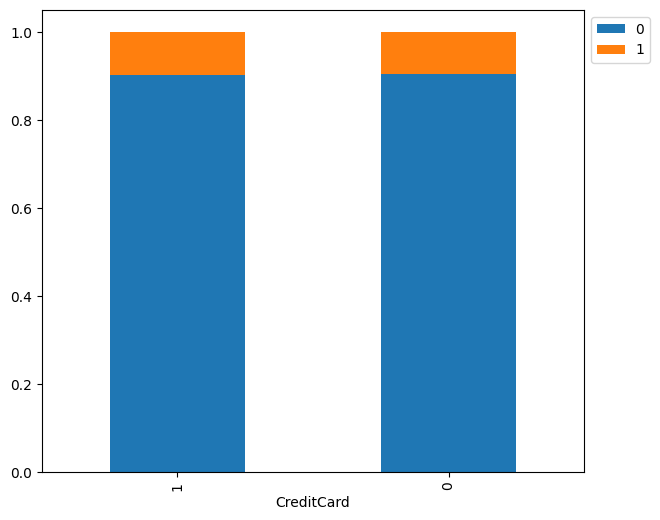

In [ ]:
# Let us look at a combination of the personal_loan across all categorical data:

for category in category_cols:
  if (category != "Personal_Loan"):
    stacked_barplot(loan_df, category, "Personal_Loan")

Observations:
  - Most variables show now tendency between having or not having a personal loan.
  - However, there are two cases where this is not true.
    - If the person has a certificate deposit. If this is true there is a >30% difference in the likelyhood of asking for a personal loan.
    - There are certain ZIPCodes that are much more likely to ask for a personal loan.

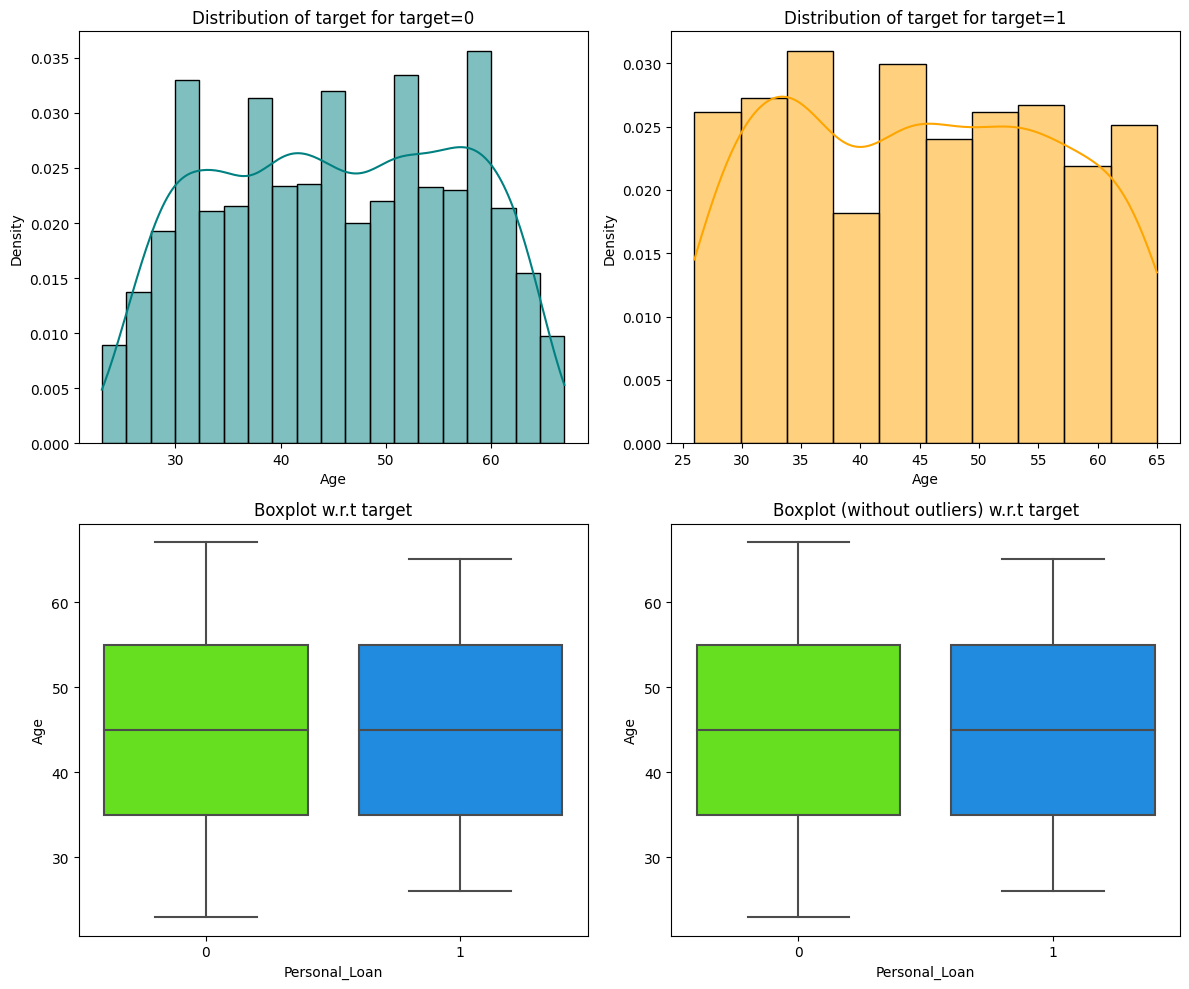

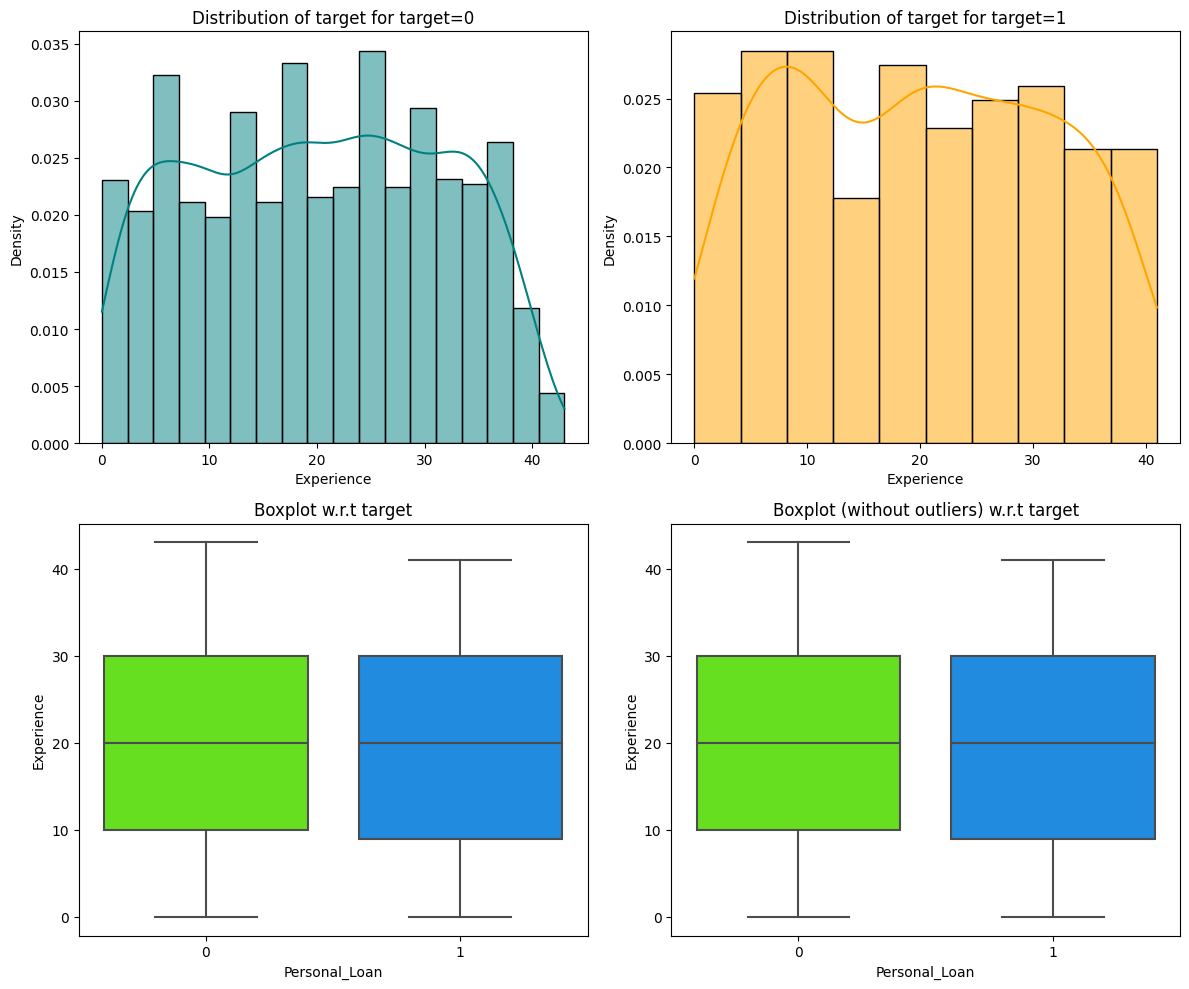

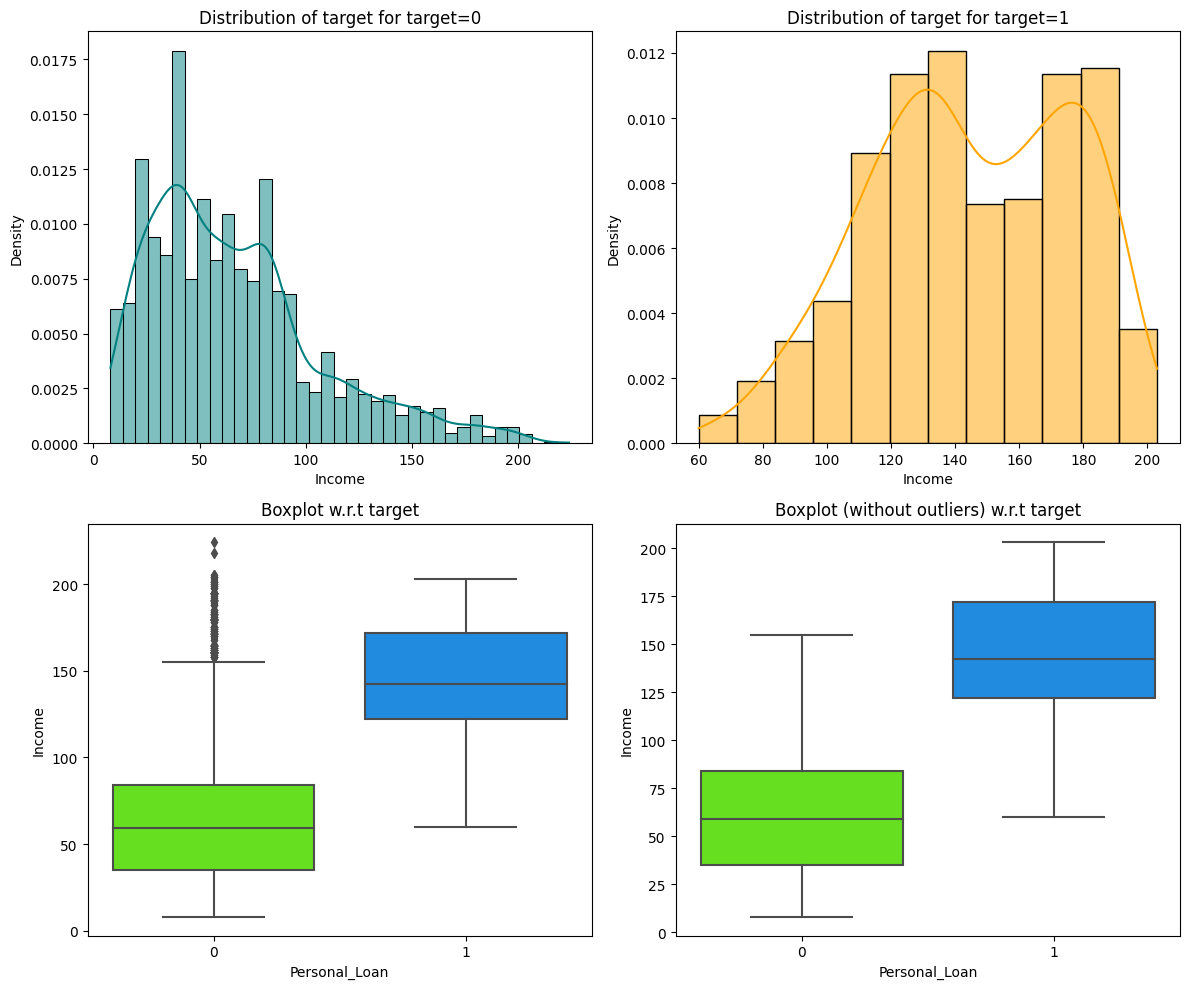

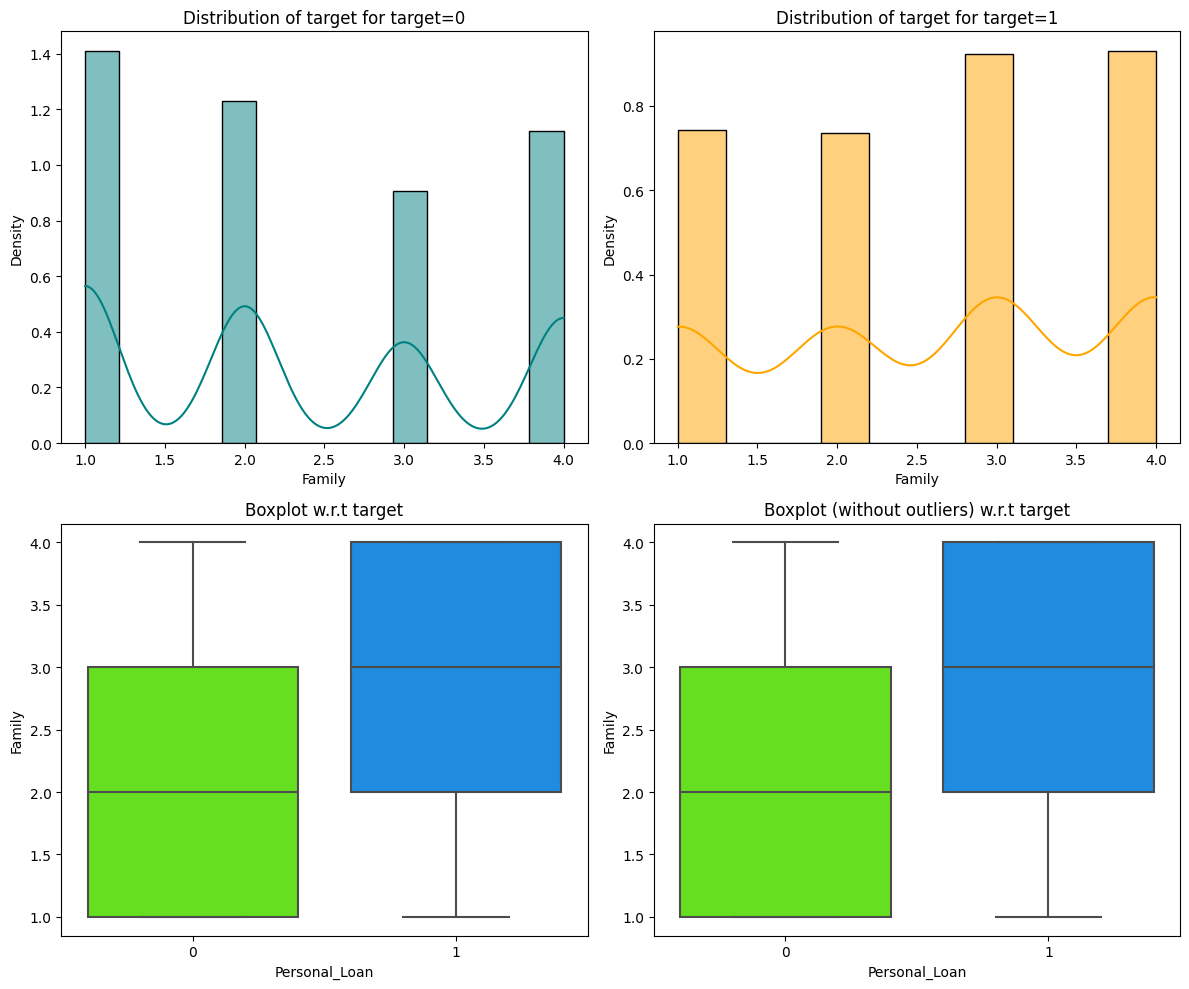

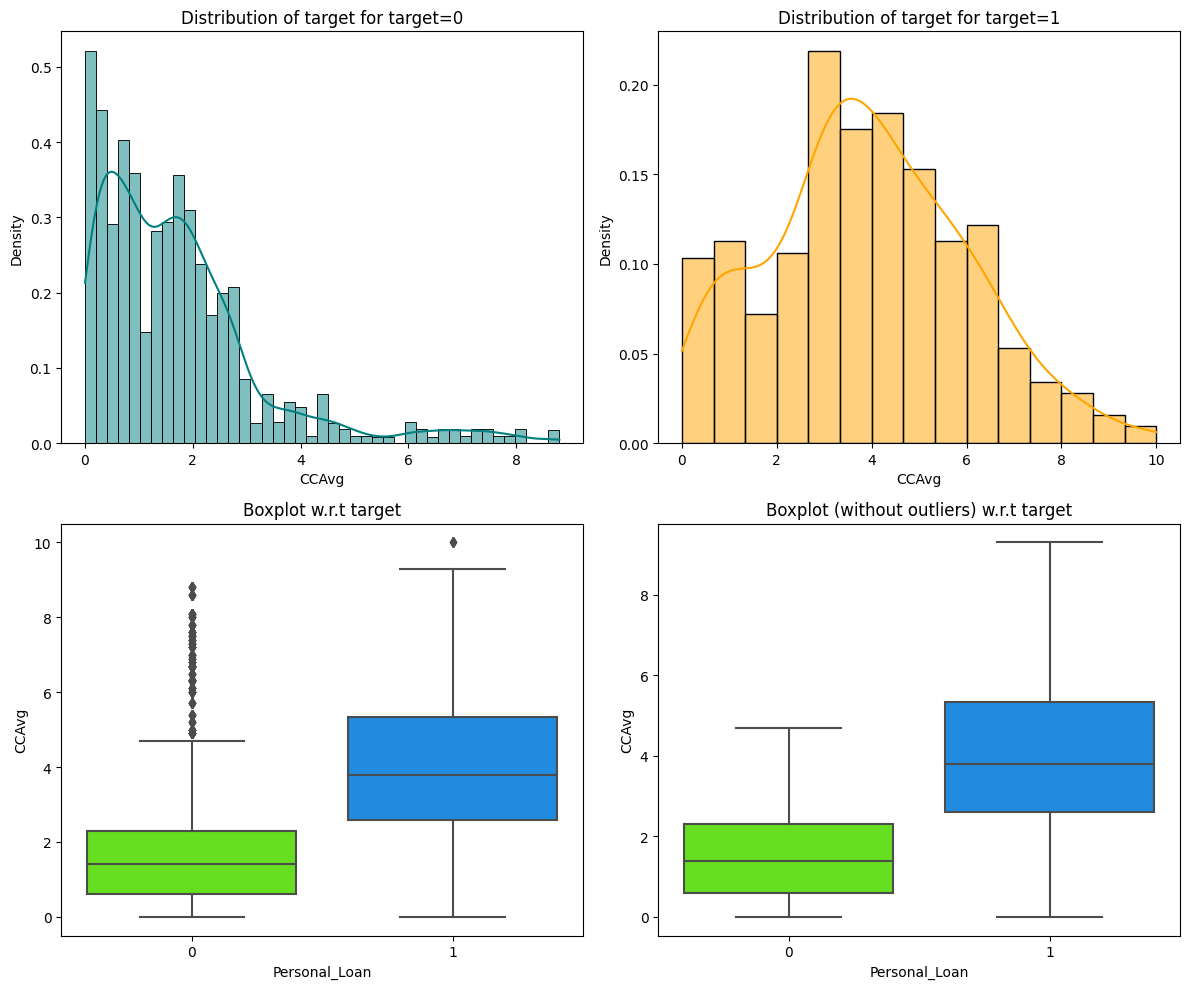

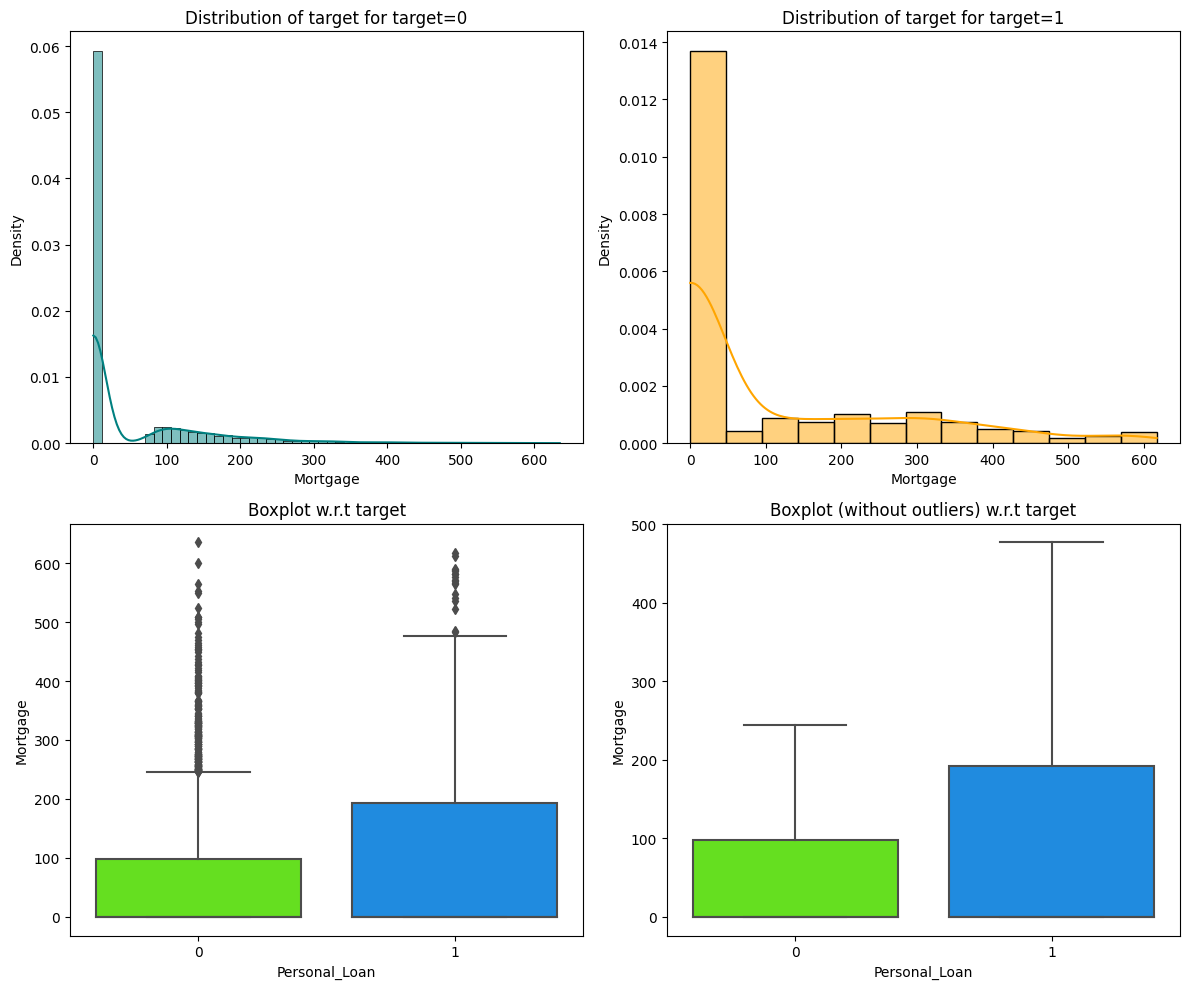

In [ ]:
# Now seeing the correlations between Personal_Loans and the numerical columns:

for column in numerical_cols:
  distribution_plot_wrt_target(loan_df, column, "Personal_Loan")
  print()

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
  - Most people do not have a mortgage as the data is completely skewed to the right.
  - There are some outliers in the distribution but it is mostly due to the >50% of the data that do not have mortgages.
2. How many customers have credit cards?
  - 1,470 customers have credit cards.
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
  - Income, Average credit card spending, and family size.
4. How does a customer's interest in purchasing a loan vary with their age?
  - It does not appear to vary significanlty, however younger and older clients do not ask for personal loans.
5. How does a customer's interest in purchasing a loan vary with their education?
  - A person is slightly more likely to ask for a personal loan if they have more than an undergraduate degree.

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [ ]:
# Missing value treatment
loan_df.isnull().sum()

Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

There are no nan values so there is no need to treat them. We have already corrected wrong data in the previous section.

**Feature Engineering**

All categorical values are already one hot encoded and have a category type variable. And all other volumns have the appropriate type.


In [ ]:
# Outlier detection
Q1 = loan_df.quantile(0.25)  # Complete the code to find the 25th percentile and 75th percentile.
Q3 = loan_df.quantile(0.75)  # Complete the code to find the 75th percentile and 75th percentile.

IQR = Q3 - Q1               # Inter Quantile Range (75th perentile - 25th percentile)

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

((loan_df.select_dtypes(include=["float64", "int64"]) < lower)
    |(loan_df.select_dtypes(include=["float64", "int64"]) > upper)
).sum() / len(loan_df) * 100

Age           0.00
Experience    0.00
Income        1.92
Family        0.00
CCAvg         6.48
Mortgage      5.82
dtype: float64

I do not believe theres is any treatment required as the amount of outliers is low and could provide important informaiton.

**Preparing data for model**


In [ ]:
# Split into x and y data
X = loan_df.drop(["Personal_Loan"], axis=1)
Y = loan_df["Personal_Loan"]

# Spliting data into train and test split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

# Sanity check data splits
print(f"Shape of training set: {x_train.shape}")
print(f"Shape of testing set: {x_test.shape}")
print()
print(f"Percentage of classes in training set:\n {y_train.value_counts(normalize=True)}")
print()
print(f"Percentage of classes in testing set:\n {y_test.value_counts(normalize=True)}")

Shape of training set: (3500, 12)
Shape of testing set: (1500, 12)

Percentage of classes in training set:
 0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64

Percentage of classes in testing set:
 0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

#### Model can have two wrong guesses:
  1. A case where the model predicts a customer wants a personal loan, but in reality does not. (False-Positive in confusion matrix)
  2. A case where the model predicts that a customer does not want a personal loan, but in reality they do. (False-Negative in confusion matrix)


#### Which of the two cases is more important
In this case, the second of the two will be more important. Since losing a potential customer loses potential revenue for the bank and that presents a higher cost to the bank.

#### Do we want to maximize precision or recall?
Therefore we want to maximize recall, or minimize the amount of false-negatives that the model presents.

### Model Building

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn, from Additional Case Study
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [ ]:
# Function to plot confusion matrix, from Additional Case Study
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [ ]:
# Creating decision tree model
model = DecisionTreeClassifier(random_state=1) # Default criterion is gini
model.fit(x_train, y_train)


DecisionTreeClassifier(random_state=1)

#### Performance on training data:

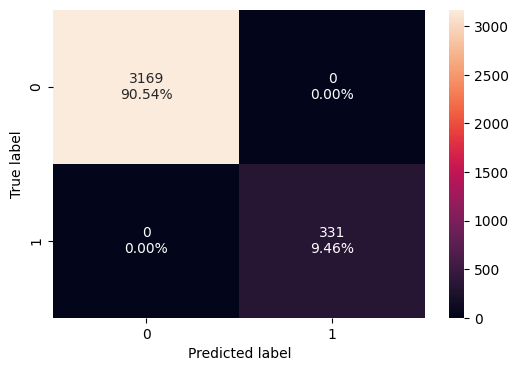

In [ ]:
# Model confusion matrix:
confusion_matrix_sklearn(model, x_train, y_train)

In [ ]:
decision_tree_performance_train = model_performance_classification_sklearn(model, x_train, y_train)
decision_tree_performance_train

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


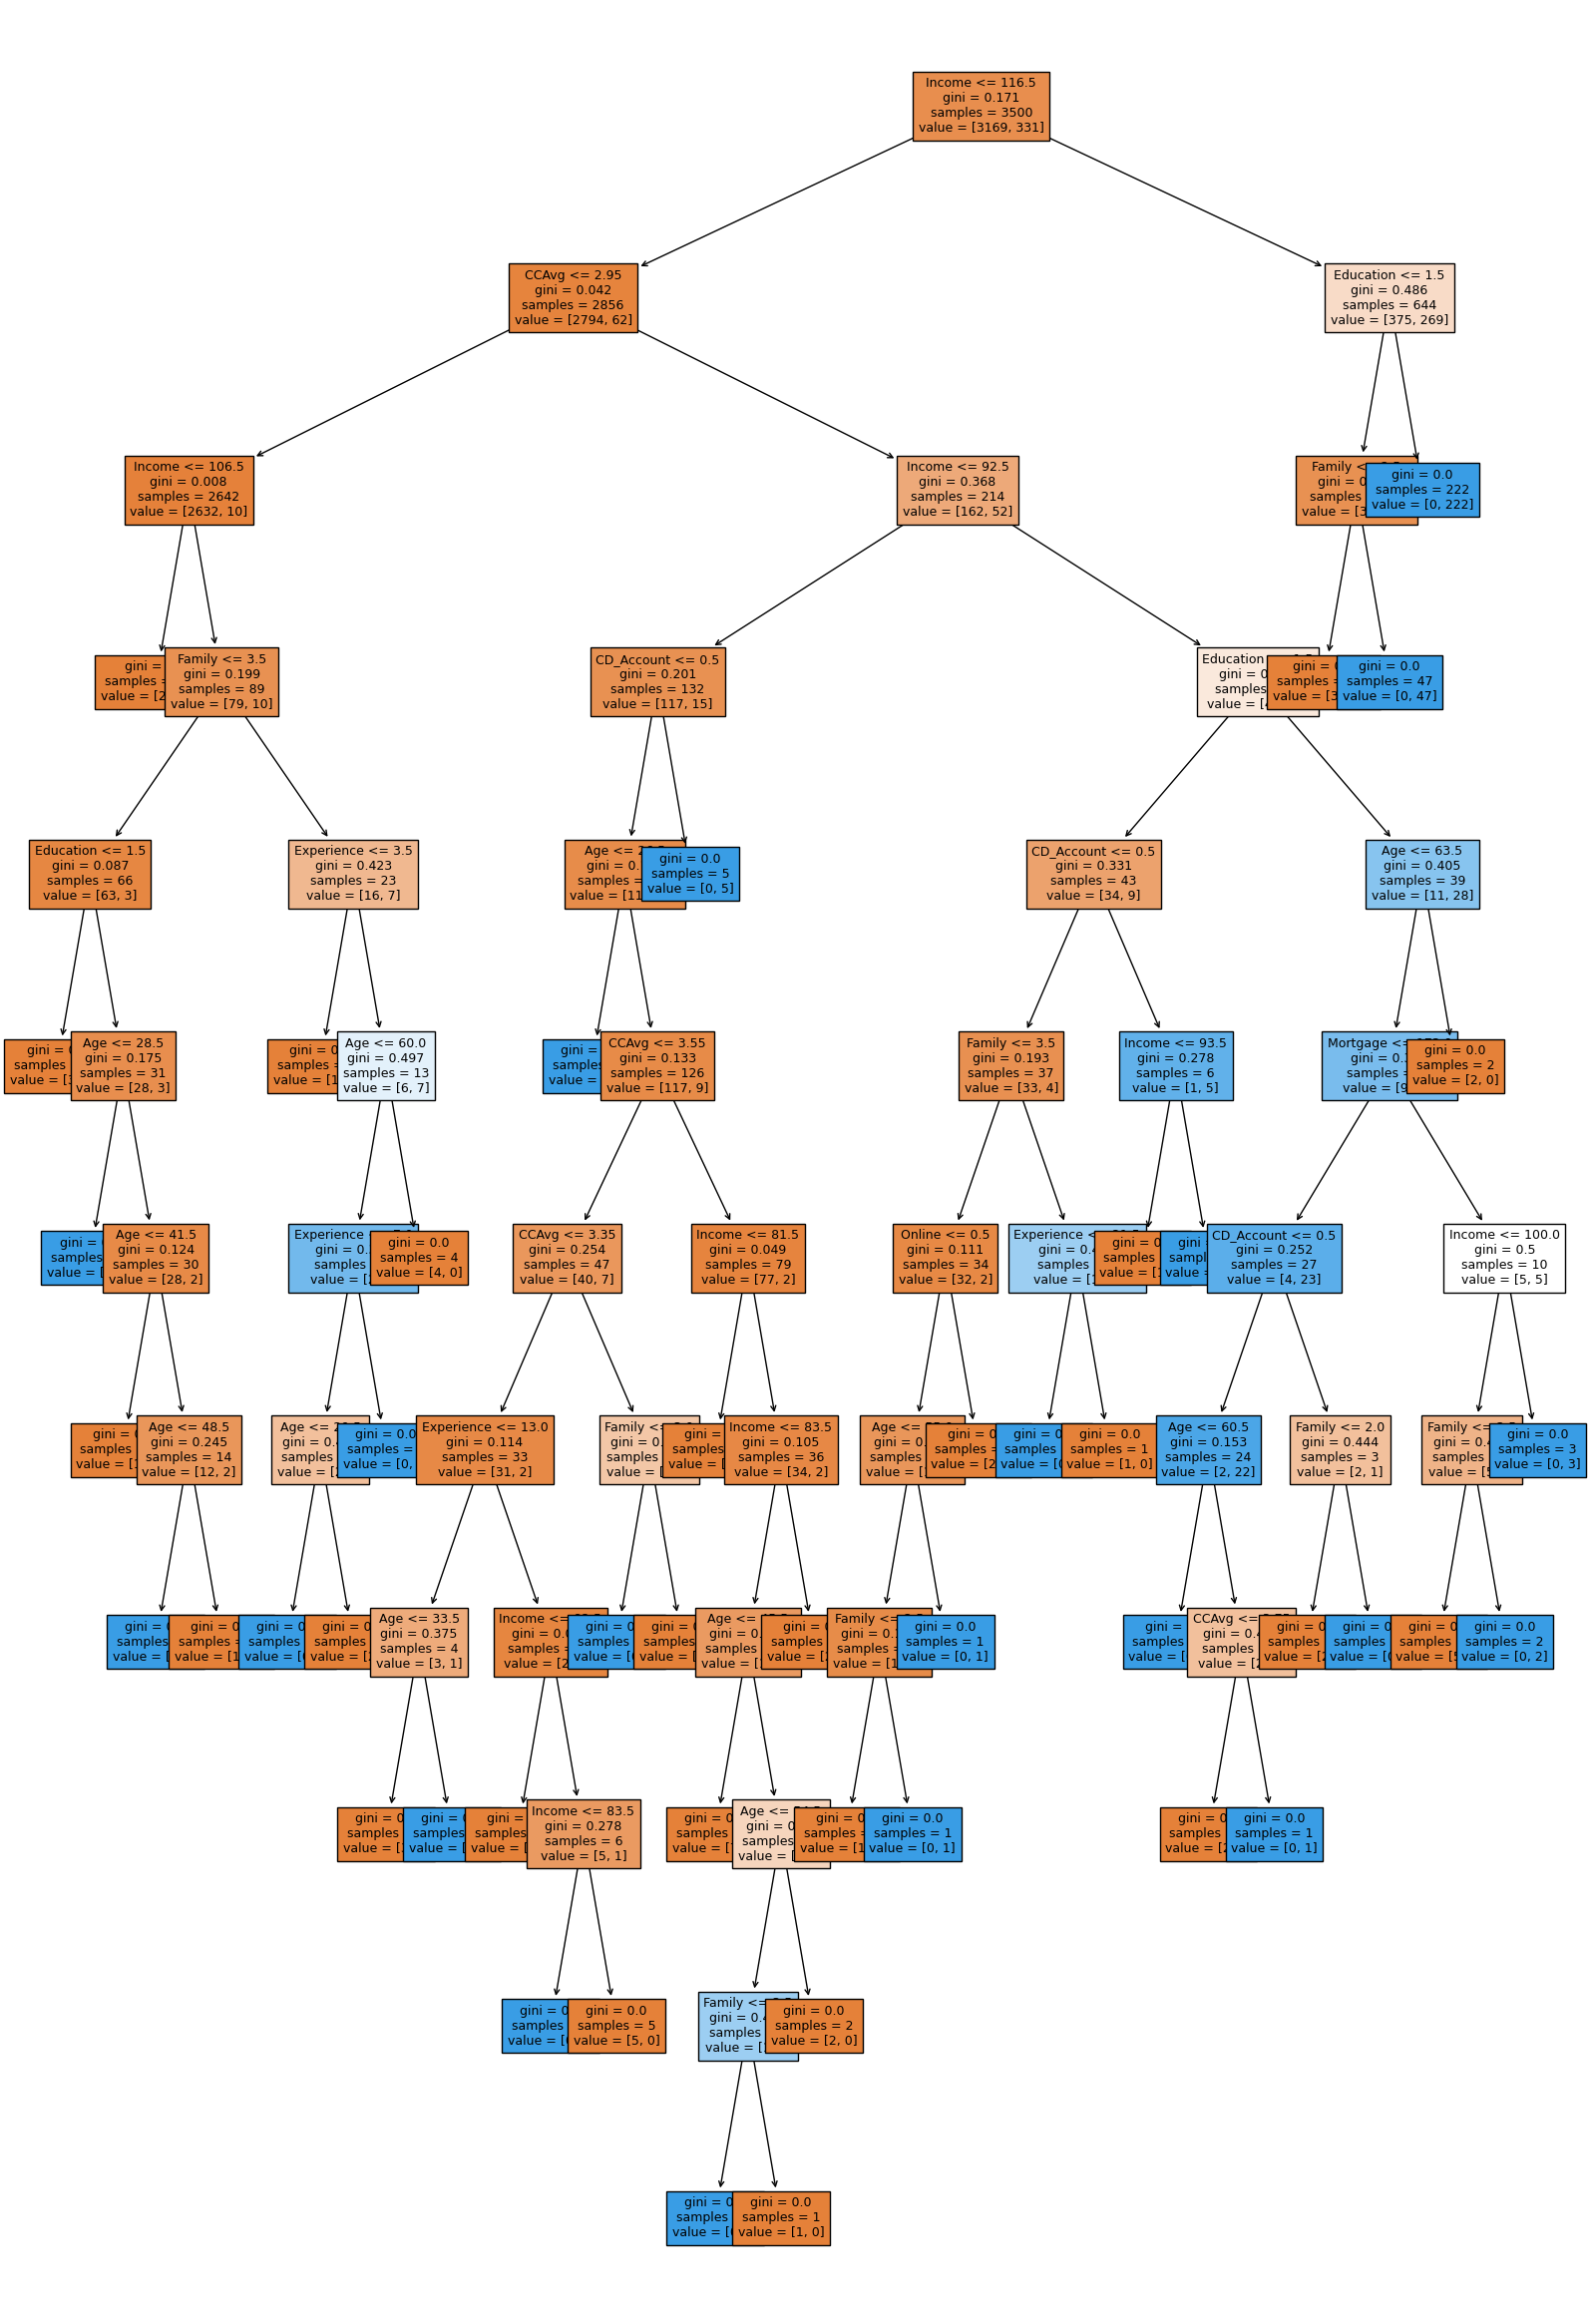

In [ ]:
# Tree visualization
feature_names = list(x_train.columns)
print(feature_names)
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()


In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- Education <= 1.50
|   |   |   |   |   |--- weights: [35.00, 0.00] class: 0
|   |   |   |   |--- Education >  1.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- Age <= 41.50
|   |   |   |   |   |   |   |--- weights: [16.00, 0.00] class: 0
|   |   |   |   |   |   |--- Age >  41.50
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 2.00] class: 1
|   |   |   |   |   |   |   |--- Age >  48.50
|   |   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience > 

                         Imp
Education           0.401465
Income              0.308336
Family              0.169593
CCAvg               0.044408
Age                 0.035708
CD_Account          0.025711
Experience          0.011203
Mortgage            0.003014
Online              0.000561
ZIPCode             0.000000
Securities_Account  0.000000
CreditCard          0.000000


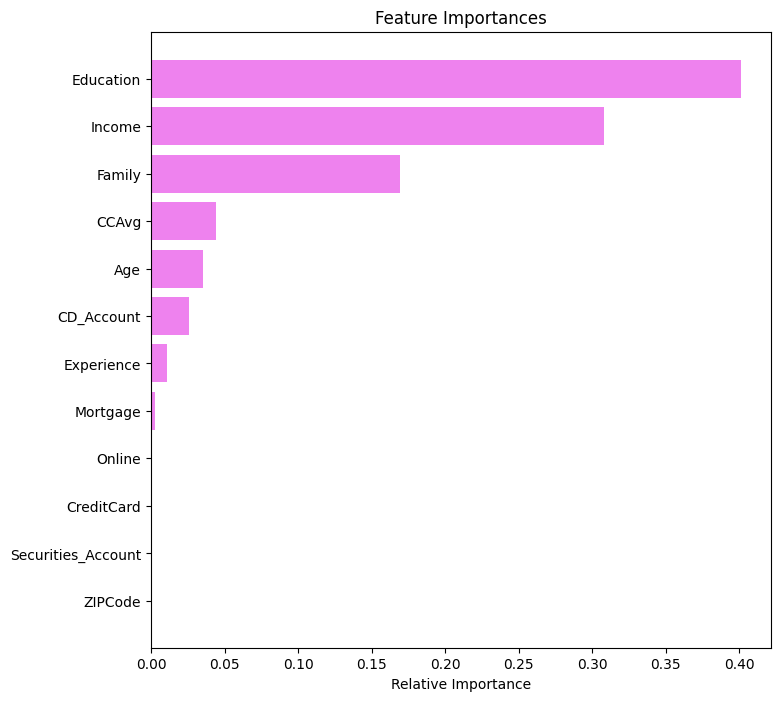

In [ ]:
# importance of features in the tree building
print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

#### Performance on training data

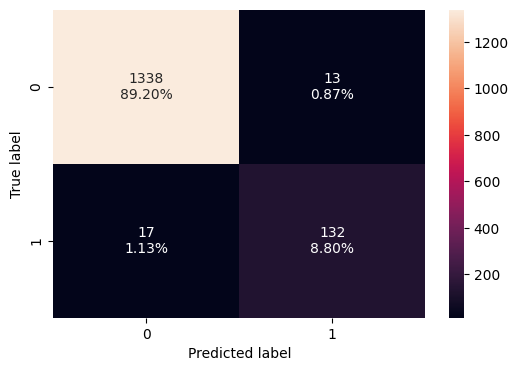

In [ ]:
# Model confusion matrix:
confusion_matrix_sklearn(model, x_test, y_test)

In [ ]:
decision_tree_performance_test = model_performance_classification_sklearn(model, x_test, y_test)
decision_tree_performance_test

,Accuracy,Recall,Precision,F1
0,0.98,0.885906,0.910345,0.897959


From, what we expect to be an overfit model, we get a very good score of 0.8889 of Recall, which is a very high starting point. However we can probably do better if we prune the tree to avoid overfitting.

### Model Performance Improvement

#### Pre-Pruning

In [ ]:
# Model to create
estimator = DecisionTreeClassifier(random_state=1)

# Designate parameters:
parameters = {
    "max_depth": list(np.arange(5, 15)),
    "min_samples_leaf": [1, 2, 3, 5, 7, 10],
    "max_leaf_nodes": [2, 3, 5, 10],
    "criterion": ["entropy", "gini"],
}

accuracy_scorer = make_scorer(recall_score)

# Run grid searcch
grid_object = GridSearchCV(estimator, parameters, scoring=accuracy_scorer, cv=5)
grid_object = grid_object.fit(x_train, y_train)

pre_prune_model = grid_object.best_estimator_
pre_prune_model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, max_leaf_nodes=10,
                       random_state=1)

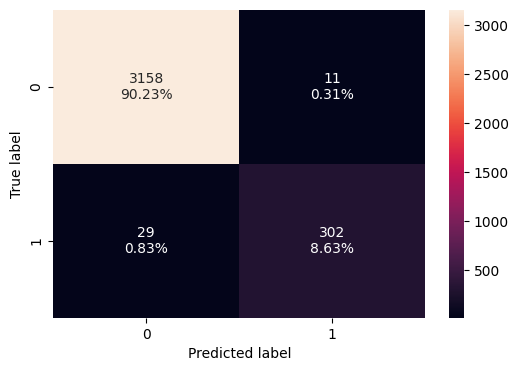

In [ ]:
# Model confusion matrix:
confusion_matrix_sklearn(pre_prune_model, x_train, y_train)

In [ ]:
pre_prune_decision_tree_performance_train = model_performance_classification_sklearn(pre_prune_model, x_train, y_train)
pre_prune_decision_tree_performance_train

,Accuracy,Recall,Precision,F1
0,0.988571,0.912387,0.964856,0.937888


['Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg', 'Education', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard']


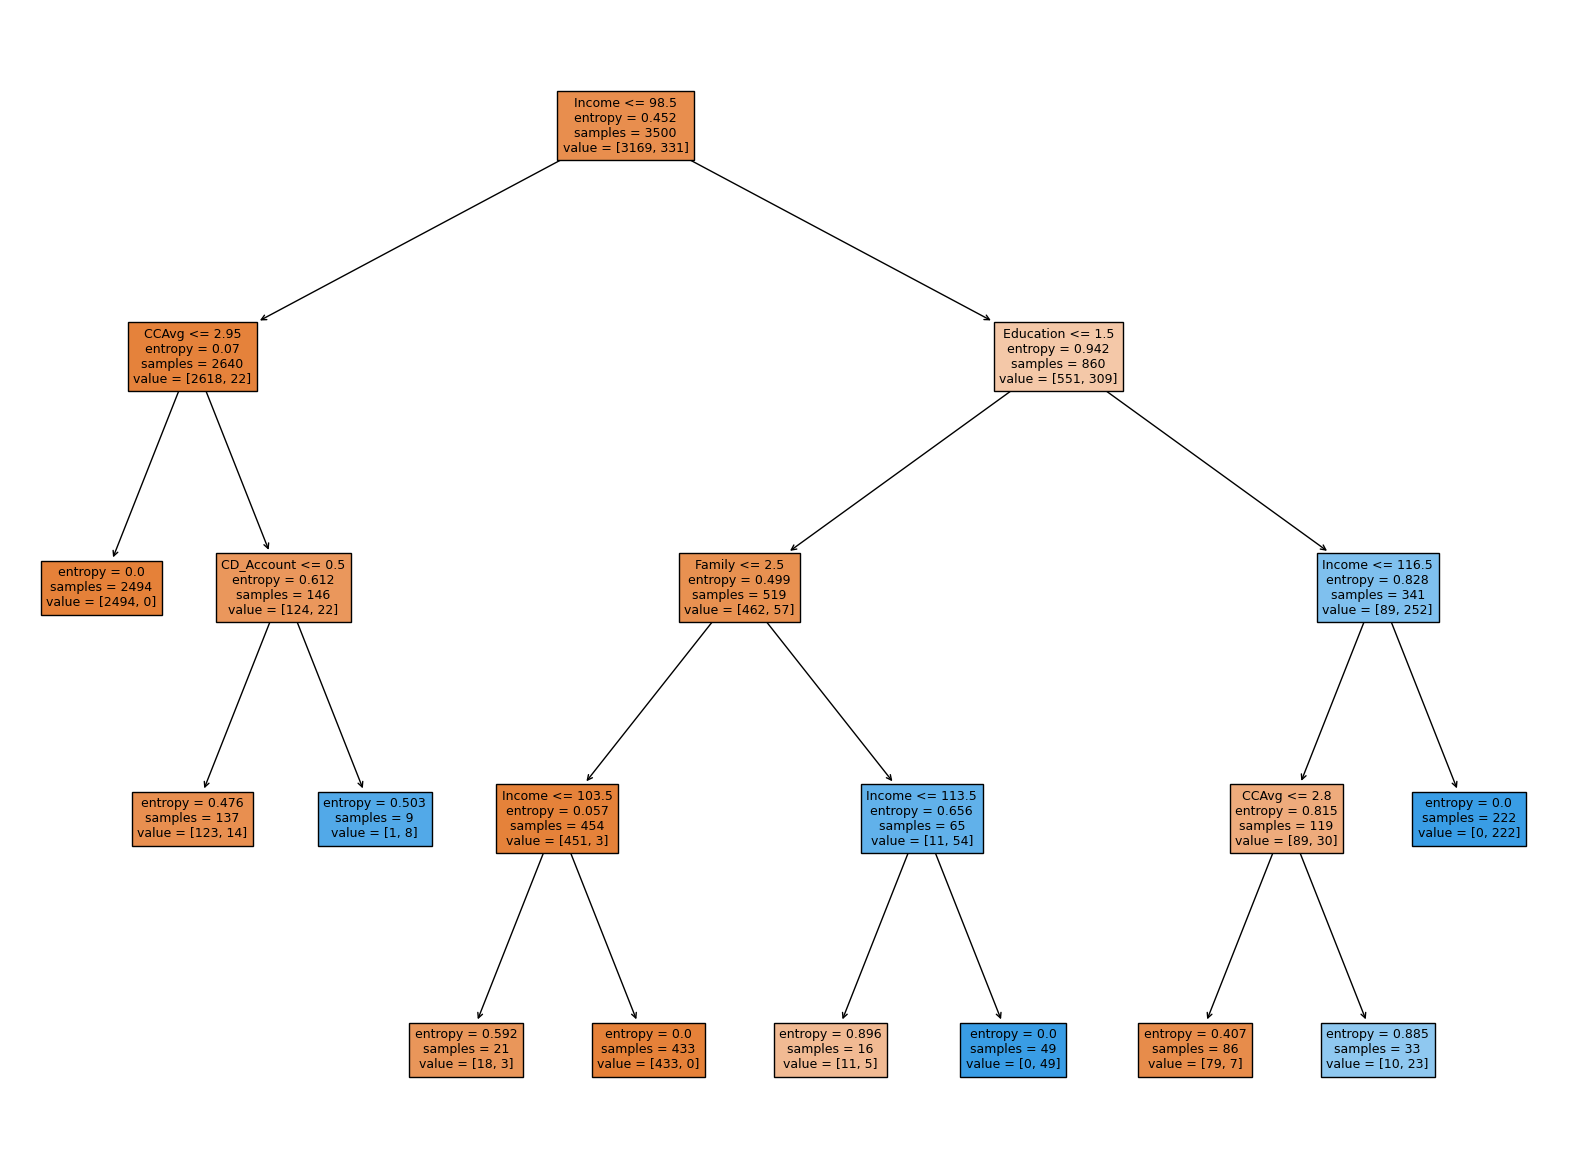

In [ ]:
# Tree visualization
feature_names = list(x_train.columns)
print(feature_names)
plt.figure(figsize=(20, 15))
out = tree.plot_tree(
    pre_prune_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(pre_prune_model, feature_names=feature_names, show_weights=True))

|--- Income <= 98.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2494.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- CD_Account <= 0.50
|   |   |   |--- weights: [123.00, 14.00] class: 0
|   |   |--- CD_Account >  0.50
|   |   |   |--- weights: [1.00, 8.00] class: 1
|--- Income >  98.50
|   |--- Education <= 1.50
|   |   |--- Family <= 2.50
|   |   |   |--- Income <= 103.50
|   |   |   |   |--- weights: [18.00, 3.00] class: 0
|   |   |   |--- Income >  103.50
|   |   |   |   |--- weights: [433.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- Income <= 113.50
|   |   |   |   |--- weights: [11.00, 5.00] class: 0
|   |   |   |--- Income >  113.50
|   |   |   |   |--- weights: [0.00, 49.00] class: 1
|   |--- Education >  1.50
|   |   |--- Income <= 116.50
|   |   |   |--- CCAvg <= 2.80
|   |   |   |   |--- weights: [79.00, 7.00] class: 0
|   |   |   |--- CCAvg >  2.80
|   |   |   |   |--- weights: [10.00, 23.00] class: 1
|   |   |--- Income >  116.50
|   |   |   |-

                         Imp
Income              0.573396
Education           0.189187
Family              0.134189
CCAvg               0.089452
CD_Account          0.013777
Age                 0.000000
Experience          0.000000
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


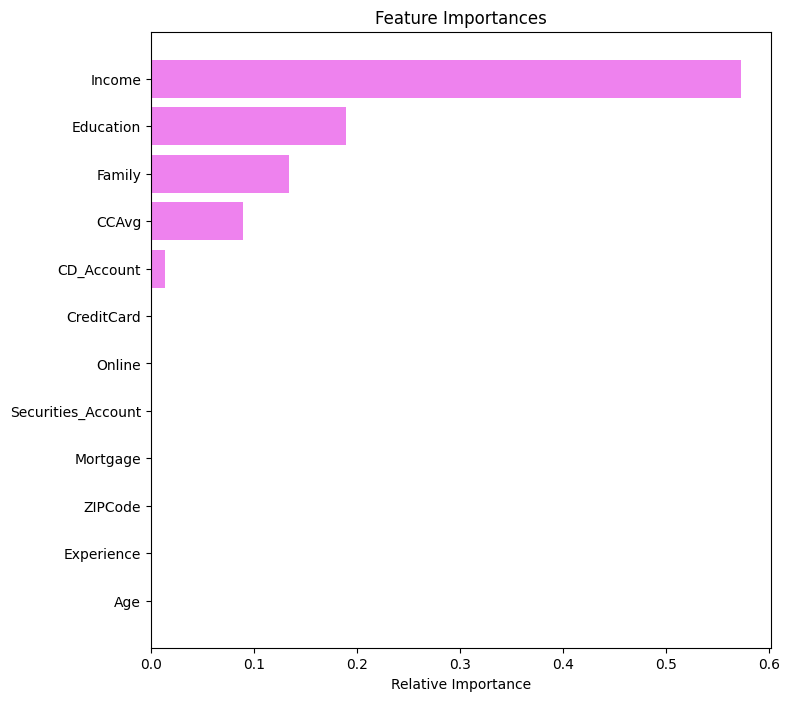

In [ ]:
# importance of features in the tree building
print(
    pd.DataFrame(
        pre_prune_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)
importances = pre_prune_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

**Chekcing performance on testing data**

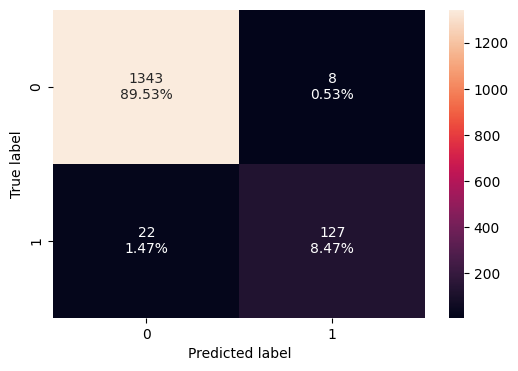

In [ ]:
# Model confusion matrix:
confusion_matrix_sklearn(pre_prune_model, x_test, y_test)

In [ ]:
pre_prune_decision_tree_performance_test = model_performance_classification_sklearn(pre_prune_model, x_test, y_test)
pre_prune_decision_tree_performance_test

,Accuracy,Recall,Precision,F1
0,0.98,0.852349,0.940741,0.894366


The testing results decreased the recall of the model vs. the base model.

#### Post-Pruning (Cost Complexity Pruning)

In [ ]:
post_pruning_model = DecisionTreeClassifier(random_state=1)
path = post_pruning_model.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000223,0.001114
2,0.000268,0.002188
3,0.000359,0.003263
4,0.000381,0.003644
5,0.000381,0.004025
6,0.000381,0.004406
7,0.000381,0.004787
8,0.000409,0.006423
9,0.000476,0.006900


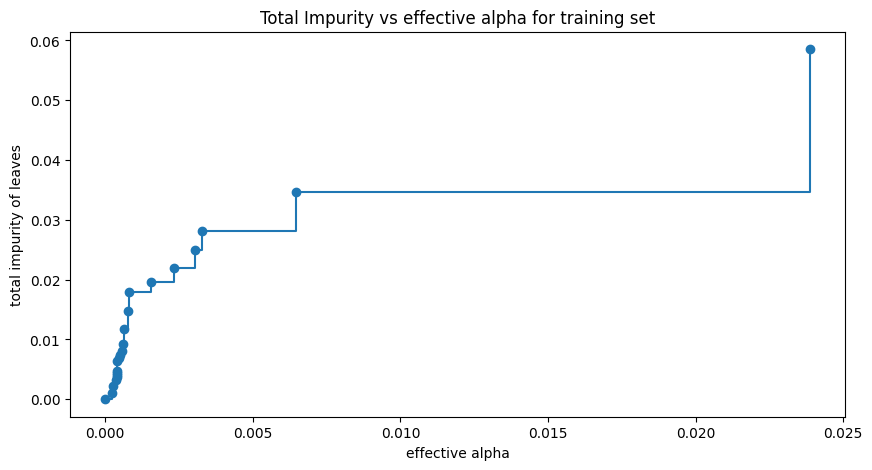

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [ ]:
# Training the model at different alphas
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

print(f"Number of nodes in the last tree is: {clfs[-1].tree_.node_count} with ccp_alpha: {path.ccp_alphas[-1]}")

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


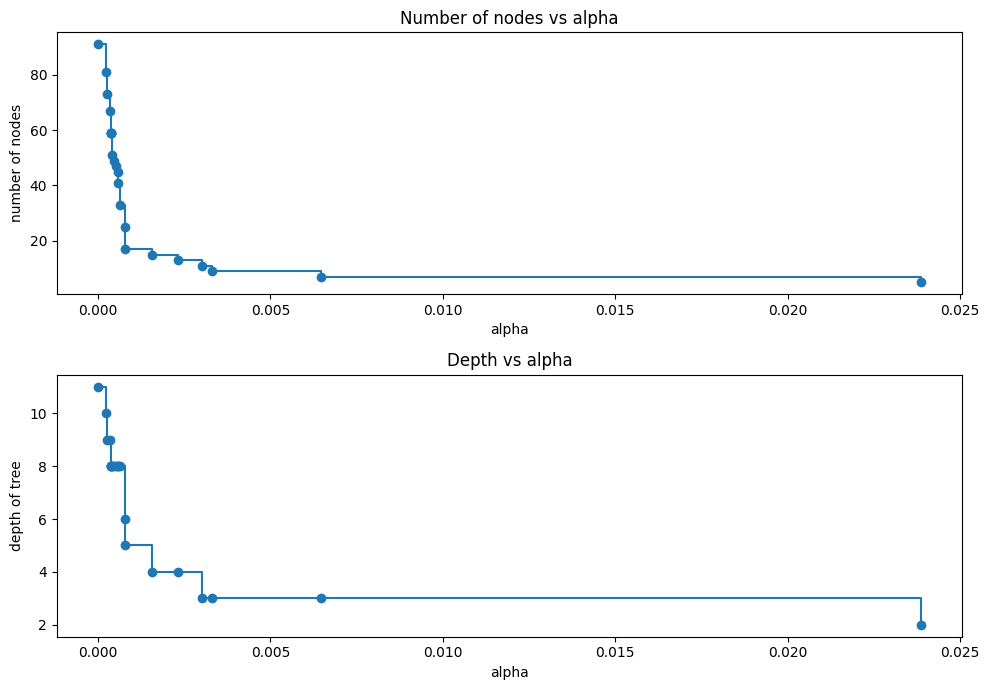

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


In [ ]:
# Gathering training and testing results from the models

recall_train = []
for clf in clfs:
    pred_train = clf.predict(x_train)
    values_train = recall_score(y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(x_test)
    values_test = recall_score(y_test, pred_test)
    recall_test.append(values_test)

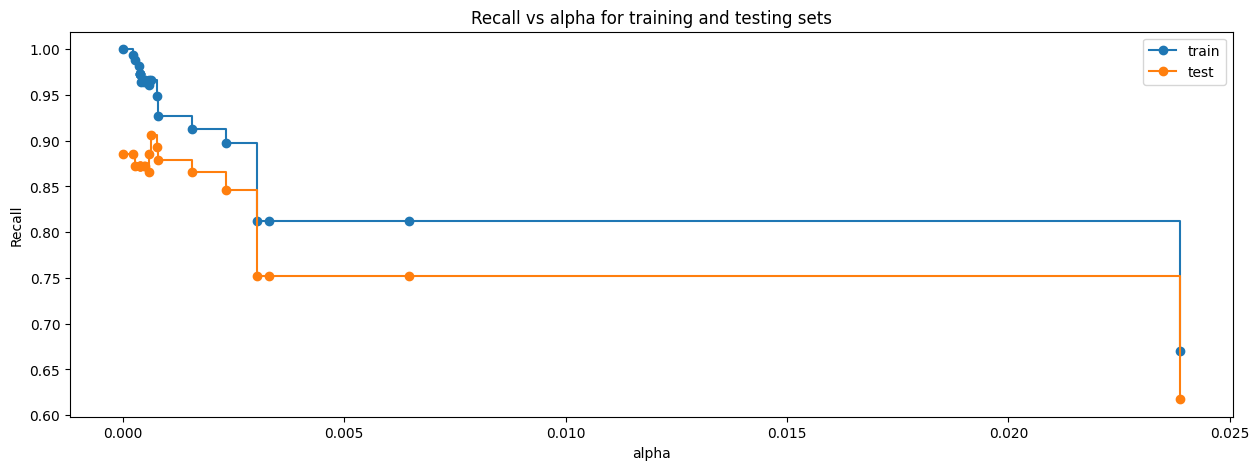

In [ ]:
# Plotting recall results at different alphas
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0006414326414326415, random_state=1)


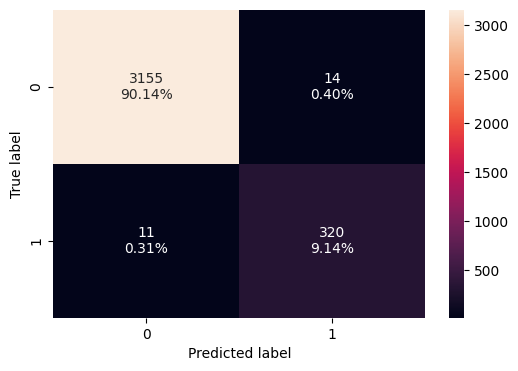

In [ ]:
# Chekcing best model on train set
confusion_matrix_sklearn(best_model, x_train, y_train)

In [ ]:
# Chekcing best model on train set
decision_tree_postpruned_perf_train = model_performance_classification_sklearn(best_model, x_train, y_train)
decision_tree_postpruned_perf_train

,Accuracy,Recall,Precision,F1
0,0.992857,0.966767,0.958084,0.962406


Chekcing post-pruning model on testing data

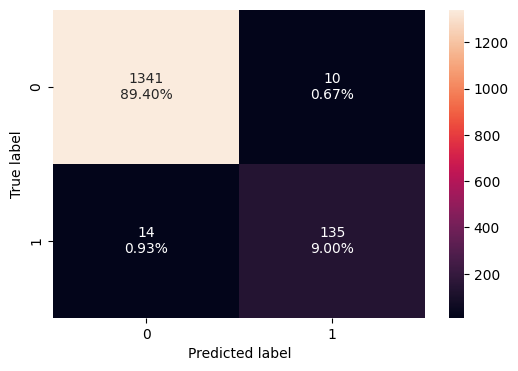

In [ ]:
confusion_matrix_sklearn(best_model, x_test, y_test)

In [ ]:
decision_tree_postpruned_perf_test = model_performance_classification_sklearn(best_model, x_test, y_test)
decision_tree_postpruned_perf_test

,Accuracy,Recall,Precision,F1
0,0.984,0.90604,0.931034,0.918367


Recall score has increased from both previous models to 0.906.

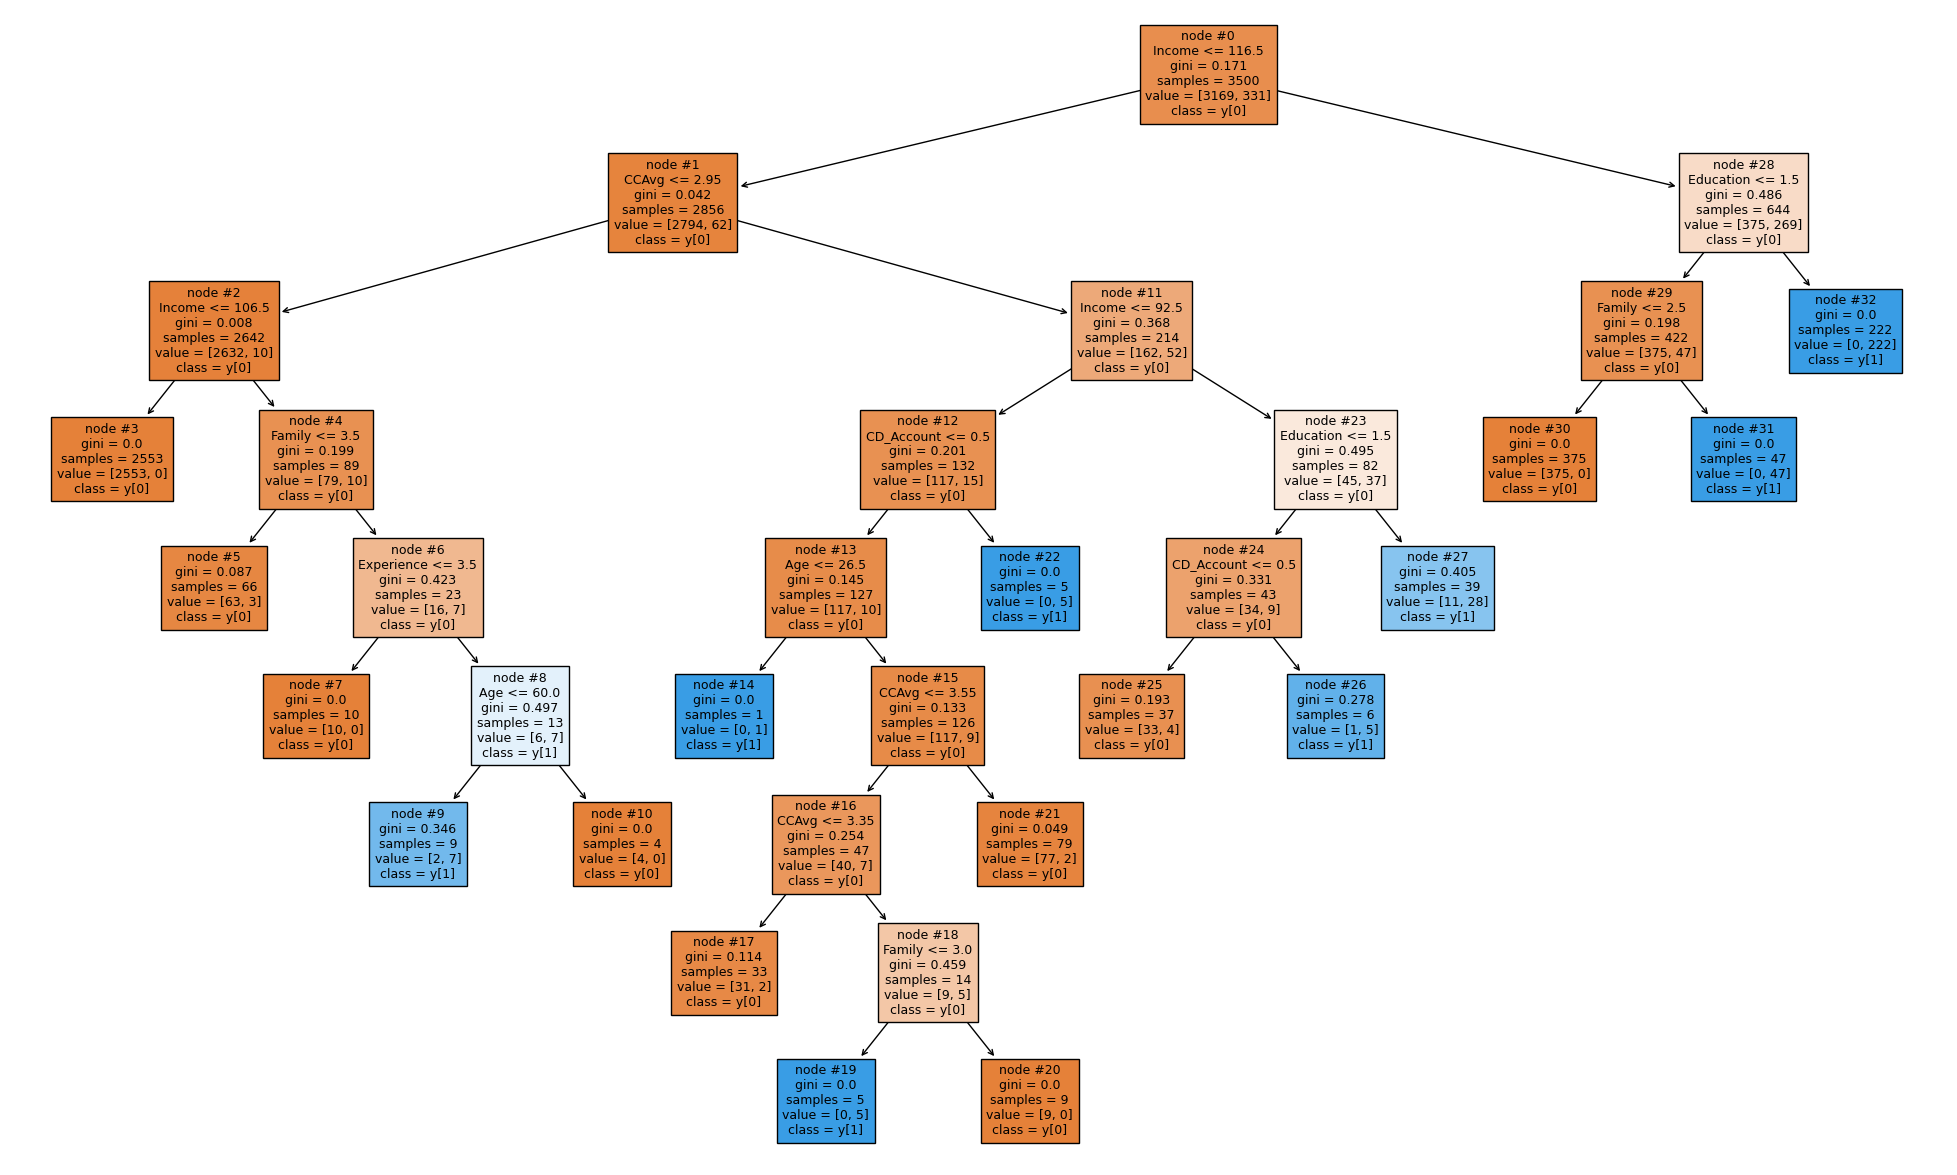

In [ ]:
# Visualizing post pruned model
plt.figure(figsize=(25, 15))

out = tree.plot_tree(
    best_model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=True,
    class_names=True,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()
plt.show()

In [ ]:
# Text report showing the rules of a decision tree -

print(tree.export_text(best_model, feature_names=feature_names, show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- weights: [63.00, 3.00] class: 0
|   |   |   |--- Family >  3.50
|   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |--- weights: [10.00, 0.00] class: 0
|   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |--- Age <= 60.00
|   |   |   |   |   |   |--- weights: [2.00, 7.00] class: 1
|   |   |   |   |   |--- Age >  60.00
|   |   |   |   |   |   |--- weights: [4.00, 0.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- CD_Account <= 0.50
|   |   |   |   |--- Age <= 26.50
|   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |--- Age >  26.50
|   |   |   |   |   |--- CCAvg <= 3.55
|   |   |   |   |   |   |--- CCAvg <= 3.35
|   |   |   |   |   |   |   |--- weights: [31.00, 2.00] class: 0
|   |   |   |   |   |   |--- CCAvg 

                         Imp
Education           0.430462
Income              0.319735
Family              0.165225
CCAvg               0.045288
CD_Account          0.024353
Age                 0.009066
Experience          0.005871
ZIPCode             0.000000
Mortgage            0.000000
Securities_Account  0.000000
Online              0.000000
CreditCard          0.000000


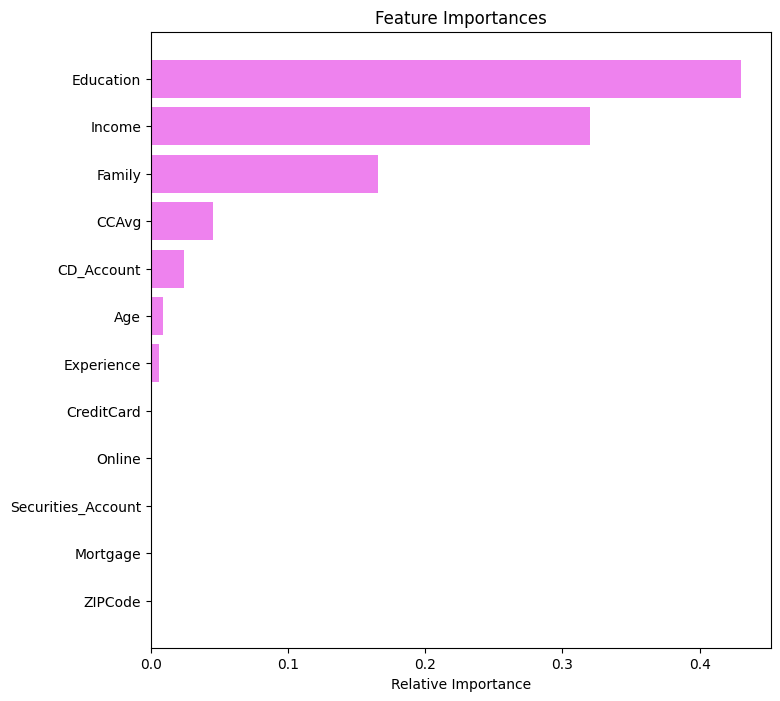

In [ ]:
# importance of features in the tree building
print(
    pd.DataFrame(
        best_model.feature_importances_, columns=["Imp"], index=x_train.columns
    ).sort_values(by="Imp", ascending=False)
)
importances = best_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(8, 8))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

## Model Comparison and Final Model Selection

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_performance_train.T,
        pre_prune_decision_tree_performance_train.T,
        decision_tree_postpruned_perf_train.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,1.0,0.988571,0.992857
Recall,1.0,0.912387,0.966767
Precision,1.0,0.964856,0.958084
F1,1.0,0.937888,0.962406


In [ ]:
# testing performance comparison

models_train_comp_df = pd.concat(
    [
        decision_tree_performance_test.T,
        pre_prune_decision_tree_performance_test.T,
        decision_tree_postpruned_perf_test.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Decision Tree sklearn",
    "Decision Tree (Pre-Pruning)",
    "Decision Tree (Post-Pruning)",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Decision Tree sklearn,Decision Tree (Pre-Pruning),Decision Tree (Post-Pruning)
Accuracy,0.980000,0.980000,0.984000
Recall,0.885906,0.852349,0.906040
Precision,0.910345,0.940741,0.931034
F1,0.897959,0.894366,0.918367


## Actionable Insights and Business Recommendations


* Education, Income, and Family size (in that order) are the most important variables in determining if a customer will want a personal loan.
* Other variables that carry some importance are average credit card spending, if the customer has a certificate deposit, the customers age and their experience.
* People with an income higher than \$116.5 thousand a year with a degree higher than bachelor should be a target.
* On the other hand, people with income of less than \$116.5 thousand a year, and monthly credit card spending below \$2,950 should not be main targets as the majority of clients in that region will likely not want a personal loan.


___

In [ ]:
%%shell
jupyter nbconvert --to html "/content/drive/MyDrive/UT AI Course/Module 2 - Supervised Learning/Project 2/SL_Full_Code.ipynb"

[NbConvertApp] Converting notebook /content/drive/MyDrive/UT AI Course/Module 2 - Supervised Learning/Project 2/SL_Full_Code.ipynb to html
[NbConvertApp] Writing 4772805 bytes to /content/drive/MyDrive/UT AI Course/Module 2 - Supervised Learning/Project 2/SL_Full_Code.html
